In [19]:
import matplotlib as mpl

from glob import glob
import os
import nibabel as nb
import numpy as np
from nilearn import image
from nilearn.plotting import plot_glass_brain
from skimage.feature import peak_local_max
import random
import io
from scipy.ndimage import label

In [51]:
files = glob("D:/data/neurovault/neurovault/vetted/train/*.nii.gz")

In [3]:
len(files)

14633

In [56]:
def _get_resize_arg(target_shape):
    mni_shape_mm = np.array([148.0, 184.0, 156.0])
    target_resolution_mm = np.ceil(
        mni_shape_mm / np.array(target_shape)).astype(
        np.int32)
    target_affine = np.array([[4., 0., 0., -75.],
                              [0., 4., 0., -105.],
                              [0., 0., 4., -70.],
                              [0., 0., 0., 1.]])
    target_affine[0, 0] = target_resolution_mm[0]
    target_affine[1, 1] = target_resolution_mm[1]
    target_affine[2, 2] = target_resolution_mm[2]
    return target_affine, list(target_shape)

target_affine, target_shape = _get_resize_arg((32, 32,32))
maps = 0

#files = ["D:/data/neurovault/neurovault/vetted/eval/37992.nii.gz"]
for i, file in enumerate(files):
    print(i)
    print(file)
    nii = nb.load(file)
    data = nii.get_data()
    data[np.isnan(data)] = 0
    
    nii = nb.Nifti1Image(data, nii.affine)
    
    nii = image.resample_img(nii,
        target_affine=target_affine, target_shape=target_shape)
    
    nii = image.smooth_img(nii, 6) # !!!!!!
    
    data = nii.get_data()
    m = np.max(np.abs(data))
    data = data / m
    data = data.astype(np.float32)
    
    n_data = data*-1
    
    has_peaks = False
    for variant, l in [(data, "positive"), (n_data, "negative")]:
        new = np.zeros_like(variant)
        new[variant > 0.65] = 1
        labels, n_features = label(new)
        for j in range(1, n_features+1):
            if (labels == j).sum() < 6:
                labels[labels == j] = 0
        peaks = peak_local_max(variant, indices=False, min_distance=0,
                               num_peaks_per_label=1,
                               labels=labels,
                               threshold_abs=0.65).astype(np.float32)
        peaks[peaks > 0] = 1.0
#         if True:
#             nii = nb.Nifti1Image(np.squeeze(variant), target_affine)
#             plot_glass_brain(nii, plot_abs=False, colorbar=True)
#             #nii.to_filename(file.replace("train\", "train/preprocessed/labels/"+label+"_"))
#             nii = nb.Nifti1Image(np.squeeze(peaks), target_affine)
#             plot_glass_brain(nii, plot_abs=False, colorbar=True)
#             nii = nb.Nifti1Image(np.squeeze(labels), target_affine)
#             plot_glass_brain(nii, plot_abs=False, colorbar=True)
#             #nii.to_filename(file.replace("train\", "train/preprocessed/features/"+label+"_"))
            
        if peaks.sum() > 0:
            has_peaks=True
            maps += 1
    if not has_peaks:
        print("no peaks!!!")
#         break
    
    

0
D:/data/neurovault/neurovault/vetted/train\0003.nii.gz
1
D:/data/neurovault/neurovault/vetted/train\0005.nii.gz
2
D:/data/neurovault/neurovault/vetted/train\0010.nii.gz
3
D:/data/neurovault/neurovault/vetted/train\0056.nii.gz
4
D:/data/neurovault/neurovault/vetted/train\0057.nii.gz
5
D:/data/neurovault/neurovault/vetted/train\0058.nii.gz
6
D:/data/neurovault/neurovault/vetted/train\0060.nii.gz
7
D:/data/neurovault/neurovault/vetted/train\0063.nii.gz
8
D:/data/neurovault/neurovault/vetted/train\0064.nii.gz
9
D:/data/neurovault/neurovault/vetted/train\0088.nii.gz
10
D:/data/neurovault/neurovault/vetted/train\0089.nii.gz
11
D:/data/neurovault/neurovault/vetted/train\0090.nii.gz
12
D:/data/neurovault/neurovault/vetted/train\0091.nii.gz
13
D:/data/neurovault/neurovault/vetted/train\0092.nii.gz
14
D:/data/neurovault/neurovault/vetted/train\0093.nii.gz
15
D:/data/neurovault/neurovault/vetted/train\0109.nii.gz
16
D:/data/neurovault/neurovault/vetted/train\0112.nii.gz
17
D:/data/neurovault/ne

143
D:/data/neurovault/neurovault/vetted/train\0462.nii.gz
144
D:/data/neurovault/neurovault/vetted/train\0463.nii.gz
145
D:/data/neurovault/neurovault/vetted/train\0464.nii.gz
146
D:/data/neurovault/neurovault/vetted/train\0465.nii.gz
147
D:/data/neurovault/neurovault/vetted/train\0466.nii.gz
148
D:/data/neurovault/neurovault/vetted/train\0468.nii.gz
149
D:/data/neurovault/neurovault/vetted/train\0469.nii.gz
150
D:/data/neurovault/neurovault/vetted/train\0472.nii.gz
151
D:/data/neurovault/neurovault/vetted/train\0526.nii.gz
152
D:/data/neurovault/neurovault/vetted/train\0527.nii.gz
153
D:/data/neurovault/neurovault/vetted/train\0528.nii.gz
154
D:/data/neurovault/neurovault/vetted/train\0529.nii.gz
155
D:/data/neurovault/neurovault/vetted/train\0530.nii.gz
156
D:/data/neurovault/neurovault/vetted/train\0532.nii.gz
157
D:/data/neurovault/neurovault/vetted/train\0533.nii.gz
158
D:/data/neurovault/neurovault/vetted/train\0534.nii.gz
159
D:/data/neurovault/neurovault/vetted/train\0535.nii.

284
D:/data/neurovault/neurovault/vetted/train\10318.nii.gz
285
D:/data/neurovault/neurovault/vetted/train\10319.nii.gz
286
D:/data/neurovault/neurovault/vetted/train\10320.nii.gz
287
D:/data/neurovault/neurovault/vetted/train\10322.nii.gz
288
D:/data/neurovault/neurovault/vetted/train\10323.nii.gz
289
D:/data/neurovault/neurovault/vetted/train\10324.nii.gz
290
D:/data/neurovault/neurovault/vetted/train\10325.nii.gz
291
D:/data/neurovault/neurovault/vetted/train\10326.nii.gz
292
D:/data/neurovault/neurovault/vetted/train\10327.nii.gz
293
D:/data/neurovault/neurovault/vetted/train\10328.nii.gz
294
D:/data/neurovault/neurovault/vetted/train\10329.nii.gz
295
D:/data/neurovault/neurovault/vetted/train\10330.nii.gz
296
D:/data/neurovault/neurovault/vetted/train\10331.nii.gz
297
D:/data/neurovault/neurovault/vetted/train\10332.nii.gz
298
D:/data/neurovault/neurovault/vetted/train\10333.nii.gz
299
D:/data/neurovault/neurovault/vetted/train\10334.nii.gz
300
D:/data/neurovault/neurovault/vetted

421
D:/data/neurovault/neurovault/vetted/train\10582.nii.gz
422
D:/data/neurovault/neurovault/vetted/train\10584.nii.gz
423
D:/data/neurovault/neurovault/vetted/train\10585.nii.gz
424
D:/data/neurovault/neurovault/vetted/train\10586.nii.gz
425
D:/data/neurovault/neurovault/vetted/train\10587.nii.gz
426
D:/data/neurovault/neurovault/vetted/train\10588.nii.gz
427
D:/data/neurovault/neurovault/vetted/train\10589.nii.gz
428
D:/data/neurovault/neurovault/vetted/train\10590.nii.gz
429
D:/data/neurovault/neurovault/vetted/train\10591.nii.gz
430
D:/data/neurovault/neurovault/vetted/train\10592.nii.gz
431
D:/data/neurovault/neurovault/vetted/train\10594.nii.gz
432
D:/data/neurovault/neurovault/vetted/train\10596.nii.gz
433
D:/data/neurovault/neurovault/vetted/train\10597.nii.gz
434
D:/data/neurovault/neurovault/vetted/train\10598.nii.gz
435
D:/data/neurovault/neurovault/vetted/train\10599.nii.gz
436
D:/data/neurovault/neurovault/vetted/train\10600.nii.gz
437
D:/data/neurovault/neurovault/vetted

560
D:/data/neurovault/neurovault/vetted/train\1201.nii.gz
561
D:/data/neurovault/neurovault/vetted/train\1233.nii.gz
562
D:/data/neurovault/neurovault/vetted/train\12353.nii.gz
563
D:/data/neurovault/neurovault/vetted/train\12354.nii.gz
564
D:/data/neurovault/neurovault/vetted/train\12355.nii.gz
565
D:/data/neurovault/neurovault/vetted/train\12356.nii.gz
566
D:/data/neurovault/neurovault/vetted/train\12485.nii.gz
567
D:/data/neurovault/neurovault/vetted/train\12486.nii.gz
568
D:/data/neurovault/neurovault/vetted/train\12487.nii.gz
569
D:/data/neurovault/neurovault/vetted/train\12488.nii.gz
570
D:/data/neurovault/neurovault/vetted/train\12490.nii.gz
571
D:/data/neurovault/neurovault/vetted/train\12491.nii.gz
572
D:/data/neurovault/neurovault/vetted/train\12492.nii.gz
573
D:/data/neurovault/neurovault/vetted/train\12493.nii.gz
574
D:/data/neurovault/neurovault/vetted/train\12494.nii.gz
575
D:/data/neurovault/neurovault/vetted/train\12495.nii.gz
576
D:/data/neurovault/neurovault/vetted/t

697
D:/data/neurovault/neurovault/vetted/train\13634.nii.gz
698
D:/data/neurovault/neurovault/vetted/train\13836.nii.gz
699
D:/data/neurovault/neurovault/vetted/train\13851.nii.gz
700
D:/data/neurovault/neurovault/vetted/train\13852.nii.gz
701
D:/data/neurovault/neurovault/vetted/train\13915.nii.gz
702
D:/data/neurovault/neurovault/vetted/train\14008.nii.gz
703
D:/data/neurovault/neurovault/vetted/train\14041.nii.gz
704
D:/data/neurovault/neurovault/vetted/train\14042.nii.gz
705
D:/data/neurovault/neurovault/vetted/train\14045.nii.gz
706
D:/data/neurovault/neurovault/vetted/train\14046.nii.gz
707
D:/data/neurovault/neurovault/vetted/train\14140.nii.gz
708
D:/data/neurovault/neurovault/vetted/train\14169.nii.gz
709
D:/data/neurovault/neurovault/vetted/train\14170.nii.gz
710
D:/data/neurovault/neurovault/vetted/train\14171.nii.gz
711
D:/data/neurovault/neurovault/vetted/train\14172.nii.gz
712
D:/data/neurovault/neurovault/vetted/train\14173.nii.gz
713
D:/data/neurovault/neurovault/vetted

836
D:/data/neurovault/neurovault/vetted/train\14629.nii.gz
837
D:/data/neurovault/neurovault/vetted/train\14630.nii.gz
838
D:/data/neurovault/neurovault/vetted/train\14632.nii.gz
839
D:/data/neurovault/neurovault/vetted/train\14633.nii.gz
840
D:/data/neurovault/neurovault/vetted/train\14634.nii.gz
841
D:/data/neurovault/neurovault/vetted/train\14635.nii.gz
842
D:/data/neurovault/neurovault/vetted/train\14636.nii.gz
843
D:/data/neurovault/neurovault/vetted/train\14637.nii.gz
844
D:/data/neurovault/neurovault/vetted/train\14638.nii.gz
845
D:/data/neurovault/neurovault/vetted/train\14639.nii.gz
846
D:/data/neurovault/neurovault/vetted/train\14640.nii.gz
847
D:/data/neurovault/neurovault/vetted/train\14642.nii.gz
848
D:/data/neurovault/neurovault/vetted/train\14643.nii.gz
849
D:/data/neurovault/neurovault/vetted/train\14645.nii.gz
850
D:/data/neurovault/neurovault/vetted/train\14646.nii.gz
851
D:/data/neurovault/neurovault/vetted/train\14647.nii.gz
852
D:/data/neurovault/neurovault/vetted

973
D:/data/neurovault/neurovault/vetted/train\14781.nii.gz
974
D:/data/neurovault/neurovault/vetted/train\14782.nii.gz
975
D:/data/neurovault/neurovault/vetted/train\14783.nii.gz
976
D:/data/neurovault/neurovault/vetted/train\14784.nii.gz
977
D:/data/neurovault/neurovault/vetted/train\14785.nii.gz
978
D:/data/neurovault/neurovault/vetted/train\14786.nii.gz
979
D:/data/neurovault/neurovault/vetted/train\14787.nii.gz
980
D:/data/neurovault/neurovault/vetted/train\14788.nii.gz
981
D:/data/neurovault/neurovault/vetted/train\14789.nii.gz
982
D:/data/neurovault/neurovault/vetted/train\14790.nii.gz
983
D:/data/neurovault/neurovault/vetted/train\14791.nii.gz
984
D:/data/neurovault/neurovault/vetted/train\14792.nii.gz
985
D:/data/neurovault/neurovault/vetted/train\14793.nii.gz
986
D:/data/neurovault/neurovault/vetted/train\14794.nii.gz
987
D:/data/neurovault/neurovault/vetted/train\14796.nii.gz
988
D:/data/neurovault/neurovault/vetted/train\14797.nii.gz
989
D:/data/neurovault/neurovault/vetted

1109
D:/data/neurovault/neurovault/vetted/train\16210.nii.gz
1110
D:/data/neurovault/neurovault/vetted/train\1709.nii.gz
1111
D:/data/neurovault/neurovault/vetted/train\1710.nii.gz
1112
D:/data/neurovault/neurovault/vetted/train\1711.nii.gz
1113
D:/data/neurovault/neurovault/vetted/train\1712.nii.gz
1114
D:/data/neurovault/neurovault/vetted/train\17307.nii.gz
1115
D:/data/neurovault/neurovault/vetted/train\17309.nii.gz
1116
D:/data/neurovault/neurovault/vetted/train\1750.nii.gz
1117
D:/data/neurovault/neurovault/vetted/train\17951.nii.gz
no peaks!!!
1118
D:/data/neurovault/neurovault/vetted/train\17952.nii.gz
no peaks!!!
1119
D:/data/neurovault/neurovault/vetted/train\17982.nii.gz
1120
D:/data/neurovault/neurovault/vetted/train\17983.nii.gz
1121
D:/data/neurovault/neurovault/vetted/train\17984.nii.gz
1122
D:/data/neurovault/neurovault/vetted/train\17985.nii.gz
1123
D:/data/neurovault/neurovault/vetted/train\17986.nii.gz
1124
D:/data/neurovault/neurovault/vetted/train\17987.nii.gz
1125


1247
D:/data/neurovault/neurovault/vetted/train\19407.nii.gz
1248
D:/data/neurovault/neurovault/vetted/train\19409.nii.gz
1249
D:/data/neurovault/neurovault/vetted/train\19411.nii.gz
1250
D:/data/neurovault/neurovault/vetted/train\19412.nii.gz
1251
D:/data/neurovault/neurovault/vetted/train\19414.nii.gz
1252
D:/data/neurovault/neurovault/vetted/train\19417.nii.gz
1253
D:/data/neurovault/neurovault/vetted/train\19419.nii.gz
1254
D:/data/neurovault/neurovault/vetted/train\19422.nii.gz
1255
D:/data/neurovault/neurovault/vetted/train\19426.nii.gz
1256
D:/data/neurovault/neurovault/vetted/train\19429.nii.gz
1257
D:/data/neurovault/neurovault/vetted/train\19578.nii.gz
1258
D:/data/neurovault/neurovault/vetted/train\19585.nii.gz
1259
D:/data/neurovault/neurovault/vetted/train\19586.nii.gz
1260
D:/data/neurovault/neurovault/vetted/train\22141.nii.gz
1261
D:/data/neurovault/neurovault/vetted/train\22143.nii.gz
1262
D:/data/neurovault/neurovault/vetted/train\22150.nii.gz
1263
D:/data/neurovault/

1382
D:/data/neurovault/neurovault/vetted/train\22625.nii.gz
1383
D:/data/neurovault/neurovault/vetted/train\22627.nii.gz
1384
D:/data/neurovault/neurovault/vetted/train\22631.nii.gz
1385
D:/data/neurovault/neurovault/vetted/train\22633.nii.gz
1386
D:/data/neurovault/neurovault/vetted/train\22635.nii.gz
1387
D:/data/neurovault/neurovault/vetted/train\22637.nii.gz
1388
D:/data/neurovault/neurovault/vetted/train\22639.nii.gz
1389
D:/data/neurovault/neurovault/vetted/train\22643.nii.gz
1390
D:/data/neurovault/neurovault/vetted/train\22645.nii.gz
1391
D:/data/neurovault/neurovault/vetted/train\22647.nii.gz
1392
D:/data/neurovault/neurovault/vetted/train\22649.nii.gz
1393
D:/data/neurovault/neurovault/vetted/train\2265.nii.gz
1394
D:/data/neurovault/neurovault/vetted/train\22651.nii.gz
1395
D:/data/neurovault/neurovault/vetted/train\22653.nii.gz
1396
D:/data/neurovault/neurovault/vetted/train\22655.nii.gz
1397
D:/data/neurovault/neurovault/vetted/train\22657.nii.gz
1398
D:/data/neurovault/n

1516
D:/data/neurovault/neurovault/vetted/train\23335.nii.gz
1517
D:/data/neurovault/neurovault/vetted/train\23336.nii.gz
1518
D:/data/neurovault/neurovault/vetted/train\23592.nii.gz
1519
D:/data/neurovault/neurovault/vetted/train\23647.nii.gz
1520
D:/data/neurovault/neurovault/vetted/train\23876.nii.gz
1521
D:/data/neurovault/neurovault/vetted/train\23877.nii.gz
1522
D:/data/neurovault/neurovault/vetted/train\23878.nii.gz
1523
D:/data/neurovault/neurovault/vetted/train\23879.nii.gz
1524
D:/data/neurovault/neurovault/vetted/train\23880.nii.gz
1525
D:/data/neurovault/neurovault/vetted/train\23881.nii.gz
1526
D:/data/neurovault/neurovault/vetted/train\23882.nii.gz
1527
D:/data/neurovault/neurovault/vetted/train\23883.nii.gz
1528
D:/data/neurovault/neurovault/vetted/train\23884.nii.gz
1529
D:/data/neurovault/neurovault/vetted/train\23885.nii.gz
1530
D:/data/neurovault/neurovault/vetted/train\23886.nii.gz
1531
D:/data/neurovault/neurovault/vetted/train\23887.nii.gz
1532
D:/data/neurovault/

1644
D:/data/neurovault/neurovault/vetted/train\25968.nii.gz
1645
D:/data/neurovault/neurovault/vetted/train\25970.nii.gz
1646
D:/data/neurovault/neurovault/vetted/train\25971.nii.gz
1647
D:/data/neurovault/neurovault/vetted/train\25990.nii.gz
1648
D:/data/neurovault/neurovault/vetted/train\25991.nii.gz
1649
D:/data/neurovault/neurovault/vetted/train\25994.nii.gz
1650
D:/data/neurovault/neurovault/vetted/train\25995.nii.gz
1651
D:/data/neurovault/neurovault/vetted/train\25996.nii.gz
1652
D:/data/neurovault/neurovault/vetted/train\25997.nii.gz
1653
D:/data/neurovault/neurovault/vetted/train\25998.nii.gz
1654
D:/data/neurovault/neurovault/vetted/train\26000.nii.gz
1655
D:/data/neurovault/neurovault/vetted/train\26001.nii.gz
1656
D:/data/neurovault/neurovault/vetted/train\26002.nii.gz
1657
D:/data/neurovault/neurovault/vetted/train\26003.nii.gz
1658
D:/data/neurovault/neurovault/vetted/train\26004.nii.gz
1659
D:/data/neurovault/neurovault/vetted/train\26005.nii.gz
1660
D:/data/neurovault/

1780
D:/data/neurovault/neurovault/vetted/train\27173.nii.gz
1781
D:/data/neurovault/neurovault/vetted/train\27174.nii.gz
1782
D:/data/neurovault/neurovault/vetted/train\27175.nii.gz
1783
D:/data/neurovault/neurovault/vetted/train\27176.nii.gz
1784
D:/data/neurovault/neurovault/vetted/train\27177.nii.gz
1785
D:/data/neurovault/neurovault/vetted/train\27178.nii.gz
1786
D:/data/neurovault/neurovault/vetted/train\27180.nii.gz
no peaks!!!
1787
D:/data/neurovault/neurovault/vetted/train\27181.nii.gz
1788
D:/data/neurovault/neurovault/vetted/train\27182.nii.gz
1789
D:/data/neurovault/neurovault/vetted/train\27183.nii.gz
1790
D:/data/neurovault/neurovault/vetted/train\27184.nii.gz
1791
D:/data/neurovault/neurovault/vetted/train\27185.nii.gz
1792
D:/data/neurovault/neurovault/vetted/train\27186.nii.gz
1793
D:/data/neurovault/neurovault/vetted/train\2719.nii.gz
1794
D:/data/neurovault/neurovault/vetted/train\27191.nii.gz
1795
D:/data/neurovault/neurovault/vetted/train\27192.nii.gz
1796
D:/data/

1914
D:/data/neurovault/neurovault/vetted/train\27322.nii.gz
1915
D:/data/neurovault/neurovault/vetted/train\27324.nii.gz
1916
D:/data/neurovault/neurovault/vetted/train\27325.nii.gz
1917
D:/data/neurovault/neurovault/vetted/train\27326.nii.gz
1918
D:/data/neurovault/neurovault/vetted/train\27327.nii.gz
1919
D:/data/neurovault/neurovault/vetted/train\27328.nii.gz
1920
D:/data/neurovault/neurovault/vetted/train\27329.nii.gz
1921
D:/data/neurovault/neurovault/vetted/train\2733.nii.gz
1922
D:/data/neurovault/neurovault/vetted/train\27330.nii.gz
1923
D:/data/neurovault/neurovault/vetted/train\27332.nii.gz
1924
D:/data/neurovault/neurovault/vetted/train\27335.nii.gz
1925
D:/data/neurovault/neurovault/vetted/train\27337.nii.gz
1926
D:/data/neurovault/neurovault/vetted/train\27338.nii.gz
1927
D:/data/neurovault/neurovault/vetted/train\27340.nii.gz
1928
D:/data/neurovault/neurovault/vetted/train\27341.nii.gz
1929
D:/data/neurovault/neurovault/vetted/train\27342.nii.gz
1930
D:/data/neurovault/n

2050
D:/data/neurovault/neurovault/vetted/train\27545.nii.gz
2051
D:/data/neurovault/neurovault/vetted/train\27546.nii.gz
2052
D:/data/neurovault/neurovault/vetted/train\27547.nii.gz
2053
D:/data/neurovault/neurovault/vetted/train\27549.nii.gz
2054
D:/data/neurovault/neurovault/vetted/train\2755.nii.gz
2055
D:/data/neurovault/neurovault/vetted/train\27550.nii.gz
2056
D:/data/neurovault/neurovault/vetted/train\27551.nii.gz
2057
D:/data/neurovault/neurovault/vetted/train\27552.nii.gz
2058
D:/data/neurovault/neurovault/vetted/train\27553.nii.gz
2059
D:/data/neurovault/neurovault/vetted/train\27554.nii.gz
2060
D:/data/neurovault/neurovault/vetted/train\27555.nii.gz
2061
D:/data/neurovault/neurovault/vetted/train\27556.nii.gz
2062
D:/data/neurovault/neurovault/vetted/train\27557.nii.gz
2063
D:/data/neurovault/neurovault/vetted/train\27558.nii.gz
2064
D:/data/neurovault/neurovault/vetted/train\27559.nii.gz
2065
D:/data/neurovault/neurovault/vetted/train\27560.nii.gz
2066
D:/data/neurovault/n

2188
D:/data/neurovault/neurovault/vetted/train\27692.nii.gz
2189
D:/data/neurovault/neurovault/vetted/train\27693.nii.gz
2190
D:/data/neurovault/neurovault/vetted/train\27694.nii.gz
2191
D:/data/neurovault/neurovault/vetted/train\27696.nii.gz
2192
D:/data/neurovault/neurovault/vetted/train\27697.nii.gz
2193
D:/data/neurovault/neurovault/vetted/train\27698.nii.gz
2194
D:/data/neurovault/neurovault/vetted/train\27699.nii.gz
2195
D:/data/neurovault/neurovault/vetted/train\27700.nii.gz
2196
D:/data/neurovault/neurovault/vetted/train\27701.nii.gz
2197
D:/data/neurovault/neurovault/vetted/train\27702.nii.gz
no peaks!!!
2198
D:/data/neurovault/neurovault/vetted/train\27703.nii.gz
2199
D:/data/neurovault/neurovault/vetted/train\27704.nii.gz
2200
D:/data/neurovault/neurovault/vetted/train\27705.nii.gz
no peaks!!!
2201
D:/data/neurovault/neurovault/vetted/train\27706.nii.gz
2202
D:/data/neurovault/neurovault/vetted/train\27707.nii.gz
2203
D:/data/neurovault/neurovault/vetted/train\27708.nii.gz


2323
D:/data/neurovault/neurovault/vetted/train\27837.nii.gz
2324
D:/data/neurovault/neurovault/vetted/train\27838.nii.gz
2325
D:/data/neurovault/neurovault/vetted/train\27839.nii.gz
2326
D:/data/neurovault/neurovault/vetted/train\27840.nii.gz
2327
D:/data/neurovault/neurovault/vetted/train\27842.nii.gz
no peaks!!!
2328
D:/data/neurovault/neurovault/vetted/train\27843.nii.gz
2329
D:/data/neurovault/neurovault/vetted/train\27844.nii.gz
2330
D:/data/neurovault/neurovault/vetted/train\27845.nii.gz
2331
D:/data/neurovault/neurovault/vetted/train\27846.nii.gz
2332
D:/data/neurovault/neurovault/vetted/train\27847.nii.gz
2333
D:/data/neurovault/neurovault/vetted/train\27848.nii.gz
2334
D:/data/neurovault/neurovault/vetted/train\27849.nii.gz
2335
D:/data/neurovault/neurovault/vetted/train\27850.nii.gz
2336
D:/data/neurovault/neurovault/vetted/train\27851.nii.gz
2337
D:/data/neurovault/neurovault/vetted/train\27852.nii.gz
2338
D:/data/neurovault/neurovault/vetted/train\27853.nii.gz
2339
D:/data

2459
D:/data/neurovault/neurovault/vetted/train\28063.nii.gz
2460
D:/data/neurovault/neurovault/vetted/train\28064.nii.gz
2461
D:/data/neurovault/neurovault/vetted/train\28065.nii.gz
2462
D:/data/neurovault/neurovault/vetted/train\28066.nii.gz
2463
D:/data/neurovault/neurovault/vetted/train\28067.nii.gz
2464
D:/data/neurovault/neurovault/vetted/train\28068.nii.gz
2465
D:/data/neurovault/neurovault/vetted/train\28070.nii.gz
2466
D:/data/neurovault/neurovault/vetted/train\28071.nii.gz
2467
D:/data/neurovault/neurovault/vetted/train\28072.nii.gz
2468
D:/data/neurovault/neurovault/vetted/train\28074.nii.gz
2469
D:/data/neurovault/neurovault/vetted/train\28075.nii.gz
2470
D:/data/neurovault/neurovault/vetted/train\28076.nii.gz
2471
D:/data/neurovault/neurovault/vetted/train\28077.nii.gz
2472
D:/data/neurovault/neurovault/vetted/train\28078.nii.gz
2473
D:/data/neurovault/neurovault/vetted/train\28080.nii.gz
2474
D:/data/neurovault/neurovault/vetted/train\28081.nii.gz
2475
D:/data/neurovault/

2594
D:/data/neurovault/neurovault/vetted/train\28352.nii.gz
2595
D:/data/neurovault/neurovault/vetted/train\28353.nii.gz
2596
D:/data/neurovault/neurovault/vetted/train\28354.nii.gz
2597
D:/data/neurovault/neurovault/vetted/train\28355.nii.gz
2598
D:/data/neurovault/neurovault/vetted/train\28356.nii.gz
2599
D:/data/neurovault/neurovault/vetted/train\28357.nii.gz
2600
D:/data/neurovault/neurovault/vetted/train\28358.nii.gz
2601
D:/data/neurovault/neurovault/vetted/train\28359.nii.gz
2602
D:/data/neurovault/neurovault/vetted/train\2836.nii.gz
2603
D:/data/neurovault/neurovault/vetted/train\28360.nii.gz
2604
D:/data/neurovault/neurovault/vetted/train\28361.nii.gz
2605
D:/data/neurovault/neurovault/vetted/train\28362.nii.gz
2606
D:/data/neurovault/neurovault/vetted/train\28363.nii.gz
2607
D:/data/neurovault/neurovault/vetted/train\28364.nii.gz
2608
D:/data/neurovault/neurovault/vetted/train\28366.nii.gz
2609
D:/data/neurovault/neurovault/vetted/train\28367.nii.gz
2610
D:/data/neurovault/n

2726
D:/data/neurovault/neurovault/vetted/train\28816.nii.gz
2727
D:/data/neurovault/neurovault/vetted/train\28817.nii.gz
2728
D:/data/neurovault/neurovault/vetted/train\28818.nii.gz
2729
D:/data/neurovault/neurovault/vetted/train\28819.nii.gz
2730
D:/data/neurovault/neurovault/vetted/train\2882.nii.gz
2731
D:/data/neurovault/neurovault/vetted/train\28820.nii.gz
2732
D:/data/neurovault/neurovault/vetted/train\28821.nii.gz
2733
D:/data/neurovault/neurovault/vetted/train\28822.nii.gz
2734
D:/data/neurovault/neurovault/vetted/train\28823.nii.gz
2735
D:/data/neurovault/neurovault/vetted/train\28824.nii.gz
2736
D:/data/neurovault/neurovault/vetted/train\28825.nii.gz
2737
D:/data/neurovault/neurovault/vetted/train\2884.nii.gz
2738
D:/data/neurovault/neurovault/vetted/train\2885.nii.gz
2739
D:/data/neurovault/neurovault/vetted/train\2886.nii.gz
2740
D:/data/neurovault/neurovault/vetted/train\28869.nii.gz
2741
D:/data/neurovault/neurovault/vetted/train\2887.nii.gz
2742
D:/data/neurovault/neuro

2861
D:/data/neurovault/neurovault/vetted/train\30072.nii.gz
2862
D:/data/neurovault/neurovault/vetted/train\30073.nii.gz
2863
D:/data/neurovault/neurovault/vetted/train\30074.nii.gz
2864
D:/data/neurovault/neurovault/vetted/train\30075.nii.gz
2865
D:/data/neurovault/neurovault/vetted/train\30076.nii.gz
2866
D:/data/neurovault/neurovault/vetted/train\30077.nii.gz
no peaks!!!
2867
D:/data/neurovault/neurovault/vetted/train\30078.nii.gz
2868
D:/data/neurovault/neurovault/vetted/train\30079.nii.gz
2869
D:/data/neurovault/neurovault/vetted/train\30080.nii.gz
2870
D:/data/neurovault/neurovault/vetted/train\30081.nii.gz
2871
D:/data/neurovault/neurovault/vetted/train\30082.nii.gz
2872
D:/data/neurovault/neurovault/vetted/train\30083.nii.gz
no peaks!!!
2873
D:/data/neurovault/neurovault/vetted/train\30084.nii.gz
no peaks!!!
2874
D:/data/neurovault/neurovault/vetted/train\30085.nii.gz
2875
D:/data/neurovault/neurovault/vetted/train\30086.nii.gz
2876
D:/data/neurovault/neurovault/vetted/train\3

2991
D:/data/neurovault/neurovault/vetted/train\30209.nii.gz
2992
D:/data/neurovault/neurovault/vetted/train\30210.nii.gz
2993
D:/data/neurovault/neurovault/vetted/train\30211.nii.gz
2994
D:/data/neurovault/neurovault/vetted/train\30212.nii.gz
2995
D:/data/neurovault/neurovault/vetted/train\30213.nii.gz
2996
D:/data/neurovault/neurovault/vetted/train\30214.nii.gz
2997
D:/data/neurovault/neurovault/vetted/train\30215.nii.gz
2998
D:/data/neurovault/neurovault/vetted/train\30216.nii.gz
2999
D:/data/neurovault/neurovault/vetted/train\30217.nii.gz
3000
D:/data/neurovault/neurovault/vetted/train\30218.nii.gz
3001
D:/data/neurovault/neurovault/vetted/train\30219.nii.gz
no peaks!!!
3002
D:/data/neurovault/neurovault/vetted/train\30220.nii.gz
3003
D:/data/neurovault/neurovault/vetted/train\30221.nii.gz
3004
D:/data/neurovault/neurovault/vetted/train\30222.nii.gz
3005
D:/data/neurovault/neurovault/vetted/train\30223.nii.gz
3006
D:/data/neurovault/neurovault/vetted/train\30225.nii.gz
3007
D:/data

no peaks!!!
3123
D:/data/neurovault/neurovault/vetted/train\30347.nii.gz
3124
D:/data/neurovault/neurovault/vetted/train\30348.nii.gz
3125
D:/data/neurovault/neurovault/vetted/train\30349.nii.gz
3126
D:/data/neurovault/neurovault/vetted/train\30350.nii.gz
3127
D:/data/neurovault/neurovault/vetted/train\30351.nii.gz
3128
D:/data/neurovault/neurovault/vetted/train\30352.nii.gz
3129
D:/data/neurovault/neurovault/vetted/train\30354.nii.gz
3130
D:/data/neurovault/neurovault/vetted/train\30355.nii.gz
3131
D:/data/neurovault/neurovault/vetted/train\30356.nii.gz
3132
D:/data/neurovault/neurovault/vetted/train\30357.nii.gz
3133
D:/data/neurovault/neurovault/vetted/train\30358.nii.gz
3134
D:/data/neurovault/neurovault/vetted/train\30359.nii.gz
3135
D:/data/neurovault/neurovault/vetted/train\30360.nii.gz
3136
D:/data/neurovault/neurovault/vetted/train\30361.nii.gz
3137
D:/data/neurovault/neurovault/vetted/train\30362.nii.gz
3138
D:/data/neurovault/neurovault/vetted/train\30363.nii.gz
3139
D:/data

3255
D:/data/neurovault/neurovault/vetted/train\30497.nii.gz
3256
D:/data/neurovault/neurovault/vetted/train\30498.nii.gz
3257
D:/data/neurovault/neurovault/vetted/train\30499.nii.gz
no peaks!!!
3258
D:/data/neurovault/neurovault/vetted/train\30500.nii.gz
3259
D:/data/neurovault/neurovault/vetted/train\30501.nii.gz
no peaks!!!
3260
D:/data/neurovault/neurovault/vetted/train\30502.nii.gz
no peaks!!!
3261
D:/data/neurovault/neurovault/vetted/train\30504.nii.gz
no peaks!!!
3262
D:/data/neurovault/neurovault/vetted/train\30505.nii.gz
3263
D:/data/neurovault/neurovault/vetted/train\30506.nii.gz
3264
D:/data/neurovault/neurovault/vetted/train\30507.nii.gz
3265
D:/data/neurovault/neurovault/vetted/train\30508.nii.gz
no peaks!!!
3266
D:/data/neurovault/neurovault/vetted/train\30509.nii.gz
3267
D:/data/neurovault/neurovault/vetted/train\30510.nii.gz
no peaks!!!
3268
D:/data/neurovault/neurovault/vetted/train\30511.nii.gz
3269
D:/data/neurovault/neurovault/vetted/train\30512.nii.gz
3270
D:/data/

3384
D:/data/neurovault/neurovault/vetted/train\30658.nii.gz
3385
D:/data/neurovault/neurovault/vetted/train\30659.nii.gz
3386
D:/data/neurovault/neurovault/vetted/train\30660.nii.gz
3387
D:/data/neurovault/neurovault/vetted/train\30661.nii.gz
3388
D:/data/neurovault/neurovault/vetted/train\30662.nii.gz
3389
D:/data/neurovault/neurovault/vetted/train\30663.nii.gz
3390
D:/data/neurovault/neurovault/vetted/train\30665.nii.gz
3391
D:/data/neurovault/neurovault/vetted/train\30666.nii.gz
no peaks!!!
3392
D:/data/neurovault/neurovault/vetted/train\30667.nii.gz
3393
D:/data/neurovault/neurovault/vetted/train\30668.nii.gz
3394
D:/data/neurovault/neurovault/vetted/train\30669.nii.gz
3395
D:/data/neurovault/neurovault/vetted/train\30670.nii.gz
3396
D:/data/neurovault/neurovault/vetted/train\30671.nii.gz
3397
D:/data/neurovault/neurovault/vetted/train\30672.nii.gz
3398
D:/data/neurovault/neurovault/vetted/train\30673.nii.gz
3399
D:/data/neurovault/neurovault/vetted/train\30674.nii.gz
3400
D:/data

3518
D:/data/neurovault/neurovault/vetted/train\30795.nii.gz
3519
D:/data/neurovault/neurovault/vetted/train\30796.nii.gz
3520
D:/data/neurovault/neurovault/vetted/train\30797.nii.gz
3521
D:/data/neurovault/neurovault/vetted/train\30798.nii.gz
3522
D:/data/neurovault/neurovault/vetted/train\30799.nii.gz
3523
D:/data/neurovault/neurovault/vetted/train\3080.nii.gz
3524
D:/data/neurovault/neurovault/vetted/train\30800.nii.gz
3525
D:/data/neurovault/neurovault/vetted/train\30801.nii.gz
3526
D:/data/neurovault/neurovault/vetted/train\30803.nii.gz
no peaks!!!
3527
D:/data/neurovault/neurovault/vetted/train\30804.nii.gz
3528
D:/data/neurovault/neurovault/vetted/train\30805.nii.gz
3529
D:/data/neurovault/neurovault/vetted/train\30806.nii.gz
3530
D:/data/neurovault/neurovault/vetted/train\30807.nii.gz
3531
D:/data/neurovault/neurovault/vetted/train\30808.nii.gz
no peaks!!!
3532
D:/data/neurovault/neurovault/vetted/train\3081.nii.gz
3533
D:/data/neurovault/neurovault/vetted/train\30810.nii.gz
no

3649
D:/data/neurovault/neurovault/vetted/train\30929.nii.gz
3650
D:/data/neurovault/neurovault/vetted/train\30930.nii.gz
3651
D:/data/neurovault/neurovault/vetted/train\30931.nii.gz
3652
D:/data/neurovault/neurovault/vetted/train\30932.nii.gz
3653
D:/data/neurovault/neurovault/vetted/train\30933.nii.gz
3654
D:/data/neurovault/neurovault/vetted/train\30934.nii.gz
3655
D:/data/neurovault/neurovault/vetted/train\30935.nii.gz
3656
D:/data/neurovault/neurovault/vetted/train\30936.nii.gz
3657
D:/data/neurovault/neurovault/vetted/train\30937.nii.gz
no peaks!!!
3658
D:/data/neurovault/neurovault/vetted/train\30938.nii.gz
no peaks!!!
3659
D:/data/neurovault/neurovault/vetted/train\30939.nii.gz
3660
D:/data/neurovault/neurovault/vetted/train\30940.nii.gz
3661
D:/data/neurovault/neurovault/vetted/train\30941.nii.gz
3662
D:/data/neurovault/neurovault/vetted/train\30942.nii.gz
3663
D:/data/neurovault/neurovault/vetted/train\30943.nii.gz
3664
D:/data/neurovault/neurovault/vetted/train\30945.nii.gz


3779
D:/data/neurovault/neurovault/vetted/train\31107.nii.gz
3780
D:/data/neurovault/neurovault/vetted/train\31108.nii.gz
3781
D:/data/neurovault/neurovault/vetted/train\31109.nii.gz
3782
D:/data/neurovault/neurovault/vetted/train\31110.nii.gz
3783
D:/data/neurovault/neurovault/vetted/train\31111.nii.gz
3784
D:/data/neurovault/neurovault/vetted/train\31112.nii.gz
3785
D:/data/neurovault/neurovault/vetted/train\31113.nii.gz
3786
D:/data/neurovault/neurovault/vetted/train\31114.nii.gz
3787
D:/data/neurovault/neurovault/vetted/train\31115.nii.gz
3788
D:/data/neurovault/neurovault/vetted/train\31116.nii.gz
no peaks!!!
3789
D:/data/neurovault/neurovault/vetted/train\31117.nii.gz
3790
D:/data/neurovault/neurovault/vetted/train\31118.nii.gz
3791
D:/data/neurovault/neurovault/vetted/train\31119.nii.gz
no peaks!!!
3792
D:/data/neurovault/neurovault/vetted/train\31120.nii.gz
3793
D:/data/neurovault/neurovault/vetted/train\31121.nii.gz
3794
D:/data/neurovault/neurovault/vetted/train\31122.nii.gz


3908
D:/data/neurovault/neurovault/vetted/train\31245.nii.gz
3909
D:/data/neurovault/neurovault/vetted/train\31246.nii.gz
3910
D:/data/neurovault/neurovault/vetted/train\31247.nii.gz
no peaks!!!
3911
D:/data/neurovault/neurovault/vetted/train\31248.nii.gz
3912
D:/data/neurovault/neurovault/vetted/train\31249.nii.gz
3913
D:/data/neurovault/neurovault/vetted/train\31250.nii.gz
3914
D:/data/neurovault/neurovault/vetted/train\31251.nii.gz
no peaks!!!
3915
D:/data/neurovault/neurovault/vetted/train\31252.nii.gz
no peaks!!!
3916
D:/data/neurovault/neurovault/vetted/train\31253.nii.gz
no peaks!!!
3917
D:/data/neurovault/neurovault/vetted/train\31254.nii.gz
3918
D:/data/neurovault/neurovault/vetted/train\31255.nii.gz
no peaks!!!
3919
D:/data/neurovault/neurovault/vetted/train\31256.nii.gz
3920
D:/data/neurovault/neurovault/vetted/train\31257.nii.gz
3921
D:/data/neurovault/neurovault/vetted/train\31258.nii.gz
3922
D:/data/neurovault/neurovault/vetted/train\31259.nii.gz
3923
D:/data/neurovault/n

no peaks!!!
4039
D:/data/neurovault/neurovault/vetted/train\31377.nii.gz
4040
D:/data/neurovault/neurovault/vetted/train\31378.nii.gz
4041
D:/data/neurovault/neurovault/vetted/train\31379.nii.gz
4042
D:/data/neurovault/neurovault/vetted/train\31381.nii.gz
4043
D:/data/neurovault/neurovault/vetted/train\31382.nii.gz
4044
D:/data/neurovault/neurovault/vetted/train\31383.nii.gz
4045
D:/data/neurovault/neurovault/vetted/train\31384.nii.gz
4046
D:/data/neurovault/neurovault/vetted/train\31385.nii.gz
4047
D:/data/neurovault/neurovault/vetted/train\31386.nii.gz
4048
D:/data/neurovault/neurovault/vetted/train\31387.nii.gz
4049
D:/data/neurovault/neurovault/vetted/train\31388.nii.gz
4050
D:/data/neurovault/neurovault/vetted/train\31389.nii.gz
4051
D:/data/neurovault/neurovault/vetted/train\31390.nii.gz
4052
D:/data/neurovault/neurovault/vetted/train\31391.nii.gz
no peaks!!!
4053
D:/data/neurovault/neurovault/vetted/train\31392.nii.gz
4054
D:/data/neurovault/neurovault/vetted/train\31393.nii.gz


4171
D:/data/neurovault/neurovault/vetted/train\31518.nii.gz
no peaks!!!
4172
D:/data/neurovault/neurovault/vetted/train\31519.nii.gz
4173
D:/data/neurovault/neurovault/vetted/train\3152.nii.gz
4174
D:/data/neurovault/neurovault/vetted/train\31520.nii.gz
no peaks!!!
4175
D:/data/neurovault/neurovault/vetted/train\31521.nii.gz
4176
D:/data/neurovault/neurovault/vetted/train\31522.nii.gz
no peaks!!!
4177
D:/data/neurovault/neurovault/vetted/train\31523.nii.gz
4178
D:/data/neurovault/neurovault/vetted/train\31524.nii.gz
no peaks!!!
4179
D:/data/neurovault/neurovault/vetted/train\31525.nii.gz
4180
D:/data/neurovault/neurovault/vetted/train\31526.nii.gz
no peaks!!!
4181
D:/data/neurovault/neurovault/vetted/train\31527.nii.gz
4182
D:/data/neurovault/neurovault/vetted/train\31528.nii.gz
4183
D:/data/neurovault/neurovault/vetted/train\31529.nii.gz
4184
D:/data/neurovault/neurovault/vetted/train\3153.nii.gz
4185
D:/data/neurovault/neurovault/vetted/train\31530.nii.gz
4186
D:/data/neurovault/neu

4300
D:/data/neurovault/neurovault/vetted/train\31642.nii.gz
4301
D:/data/neurovault/neurovault/vetted/train\31643.nii.gz
4302
D:/data/neurovault/neurovault/vetted/train\31644.nii.gz
no peaks!!!
4303
D:/data/neurovault/neurovault/vetted/train\31645.nii.gz
no peaks!!!
4304
D:/data/neurovault/neurovault/vetted/train\31647.nii.gz
4305
D:/data/neurovault/neurovault/vetted/train\31648.nii.gz
4306
D:/data/neurovault/neurovault/vetted/train\31649.nii.gz
4307
D:/data/neurovault/neurovault/vetted/train\31650.nii.gz
4308
D:/data/neurovault/neurovault/vetted/train\31651.nii.gz
no peaks!!!
4309
D:/data/neurovault/neurovault/vetted/train\31653.nii.gz
4310
D:/data/neurovault/neurovault/vetted/train\31654.nii.gz
4311
D:/data/neurovault/neurovault/vetted/train\31655.nii.gz
4312
D:/data/neurovault/neurovault/vetted/train\31656.nii.gz
4313
D:/data/neurovault/neurovault/vetted/train\31657.nii.gz
no peaks!!!
4314
D:/data/neurovault/neurovault/vetted/train\31658.nii.gz
no peaks!!!
4315
D:/data/neurovault/n

no peaks!!!
4430
D:/data/neurovault/neurovault/vetted/train\31774.nii.gz
4431
D:/data/neurovault/neurovault/vetted/train\31775.nii.gz
4432
D:/data/neurovault/neurovault/vetted/train\31776.nii.gz
4433
D:/data/neurovault/neurovault/vetted/train\31777.nii.gz
no peaks!!!
4434
D:/data/neurovault/neurovault/vetted/train\31778.nii.gz
4435
D:/data/neurovault/neurovault/vetted/train\31780.nii.gz
4436
D:/data/neurovault/neurovault/vetted/train\31781.nii.gz
no peaks!!!
4437
D:/data/neurovault/neurovault/vetted/train\31782.nii.gz
no peaks!!!
4438
D:/data/neurovault/neurovault/vetted/train\31783.nii.gz
4439
D:/data/neurovault/neurovault/vetted/train\31784.nii.gz
4440
D:/data/neurovault/neurovault/vetted/train\31785.nii.gz
4441
D:/data/neurovault/neurovault/vetted/train\31786.nii.gz
4442
D:/data/neurovault/neurovault/vetted/train\31787.nii.gz
4443
D:/data/neurovault/neurovault/vetted/train\31788.nii.gz
no peaks!!!
4444
D:/data/neurovault/neurovault/vetted/train\31789.nii.gz
4445
D:/data/neurovault/n

4561
D:/data/neurovault/neurovault/vetted/train\31901.nii.gz
4562
D:/data/neurovault/neurovault/vetted/train\31902.nii.gz
4563
D:/data/neurovault/neurovault/vetted/train\31903.nii.gz
no peaks!!!
4564
D:/data/neurovault/neurovault/vetted/train\31904.nii.gz
4565
D:/data/neurovault/neurovault/vetted/train\31905.nii.gz
4566
D:/data/neurovault/neurovault/vetted/train\31906.nii.gz
4567
D:/data/neurovault/neurovault/vetted/train\31907.nii.gz
4568
D:/data/neurovault/neurovault/vetted/train\31908.nii.gz
no peaks!!!
4569
D:/data/neurovault/neurovault/vetted/train\31909.nii.gz
4570
D:/data/neurovault/neurovault/vetted/train\3191.nii.gz
4571
D:/data/neurovault/neurovault/vetted/train\31910.nii.gz
4572
D:/data/neurovault/neurovault/vetted/train\31911.nii.gz
4573
D:/data/neurovault/neurovault/vetted/train\31912.nii.gz
4574
D:/data/neurovault/neurovault/vetted/train\31913.nii.gz
4575
D:/data/neurovault/neurovault/vetted/train\31914.nii.gz
no peaks!!!
4576
D:/data/neurovault/neurovault/vetted/train\31

4699
D:/data/neurovault/neurovault/vetted/train\33056.nii.gz
4700
D:/data/neurovault/neurovault/vetted/train\33057.nii.gz
4701
D:/data/neurovault/neurovault/vetted/train\33059.nii.gz
4702
D:/data/neurovault/neurovault/vetted/train\33060.nii.gz
4703
D:/data/neurovault/neurovault/vetted/train\33061.nii.gz
4704
D:/data/neurovault/neurovault/vetted/train\33063.nii.gz
4705
D:/data/neurovault/neurovault/vetted/train\33064.nii.gz
4706
D:/data/neurovault/neurovault/vetted/train\33065.nii.gz
4707
D:/data/neurovault/neurovault/vetted/train\33066.nii.gz
4708
D:/data/neurovault/neurovault/vetted/train\33067.nii.gz
4709
D:/data/neurovault/neurovault/vetted/train\33068.nii.gz
4710
D:/data/neurovault/neurovault/vetted/train\33070.nii.gz
4711
D:/data/neurovault/neurovault/vetted/train\33071.nii.gz
4712
D:/data/neurovault/neurovault/vetted/train\33074.nii.gz
4713
D:/data/neurovault/neurovault/vetted/train\33075.nii.gz
4714
D:/data/neurovault/neurovault/vetted/train\33076.nii.gz
4715
D:/data/neurovault/

4838
D:/data/neurovault/neurovault/vetted/train\33219.nii.gz
4839
D:/data/neurovault/neurovault/vetted/train\33220.nii.gz
4840
D:/data/neurovault/neurovault/vetted/train\33221.nii.gz
4841
D:/data/neurovault/neurovault/vetted/train\33222.nii.gz
4842
D:/data/neurovault/neurovault/vetted/train\33223.nii.gz
4843
D:/data/neurovault/neurovault/vetted/train\33224.nii.gz
4844
D:/data/neurovault/neurovault/vetted/train\33226.nii.gz
4845
D:/data/neurovault/neurovault/vetted/train\33227.nii.gz
4846
D:/data/neurovault/neurovault/vetted/train\33228.nii.gz
4847
D:/data/neurovault/neurovault/vetted/train\33229.nii.gz
4848
D:/data/neurovault/neurovault/vetted/train\33230.nii.gz
4849
D:/data/neurovault/neurovault/vetted/train\33231.nii.gz
4850
D:/data/neurovault/neurovault/vetted/train\33233.nii.gz
4851
D:/data/neurovault/neurovault/vetted/train\33238.nii.gz
4852
D:/data/neurovault/neurovault/vetted/train\33241.nii.gz
4853
D:/data/neurovault/neurovault/vetted/train\33242.nii.gz
4854
D:/data/neurovault/

4974
D:/data/neurovault/neurovault/vetted/train\33387.nii.gz
4975
D:/data/neurovault/neurovault/vetted/train\33388.nii.gz
4976
D:/data/neurovault/neurovault/vetted/train\33390.nii.gz
4977
D:/data/neurovault/neurovault/vetted/train\33391.nii.gz
4978
D:/data/neurovault/neurovault/vetted/train\33392.nii.gz
4979
D:/data/neurovault/neurovault/vetted/train\33393.nii.gz
4980
D:/data/neurovault/neurovault/vetted/train\33394.nii.gz
4981
D:/data/neurovault/neurovault/vetted/train\33395.nii.gz
4982
D:/data/neurovault/neurovault/vetted/train\33396.nii.gz
4983
D:/data/neurovault/neurovault/vetted/train\33397.nii.gz
4984
D:/data/neurovault/neurovault/vetted/train\33398.nii.gz
4985
D:/data/neurovault/neurovault/vetted/train\33399.nii.gz
4986
D:/data/neurovault/neurovault/vetted/train\33400.nii.gz
4987
D:/data/neurovault/neurovault/vetted/train\33401.nii.gz
4988
D:/data/neurovault/neurovault/vetted/train\33402.nii.gz
4989
D:/data/neurovault/neurovault/vetted/train\33403.nii.gz
4990
D:/data/neurovault/

5111
D:/data/neurovault/neurovault/vetted/train\33534.nii.gz
5112
D:/data/neurovault/neurovault/vetted/train\33535.nii.gz
5113
D:/data/neurovault/neurovault/vetted/train\33536.nii.gz
5114
D:/data/neurovault/neurovault/vetted/train\33537.nii.gz
5115
D:/data/neurovault/neurovault/vetted/train\33539.nii.gz
5116
D:/data/neurovault/neurovault/vetted/train\33540.nii.gz
5117
D:/data/neurovault/neurovault/vetted/train\33541.nii.gz
5118
D:/data/neurovault/neurovault/vetted/train\33542.nii.gz
5119
D:/data/neurovault/neurovault/vetted/train\33543.nii.gz
5120
D:/data/neurovault/neurovault/vetted/train\33544.nii.gz
5121
D:/data/neurovault/neurovault/vetted/train\33545.nii.gz
5122
D:/data/neurovault/neurovault/vetted/train\33546.nii.gz
5123
D:/data/neurovault/neurovault/vetted/train\33548.nii.gz
5124
D:/data/neurovault/neurovault/vetted/train\33550.nii.gz
5125
D:/data/neurovault/neurovault/vetted/train\33551.nii.gz
5126
D:/data/neurovault/neurovault/vetted/train\33552.nii.gz
5127
D:/data/neurovault/

5245
D:/data/neurovault/neurovault/vetted/train\33684.nii.gz
5246
D:/data/neurovault/neurovault/vetted/train\33685.nii.gz
5247
D:/data/neurovault/neurovault/vetted/train\33686.nii.gz
5248
D:/data/neurovault/neurovault/vetted/train\33687.nii.gz
5249
D:/data/neurovault/neurovault/vetted/train\33688.nii.gz
5250
D:/data/neurovault/neurovault/vetted/train\33689.nii.gz
5251
D:/data/neurovault/neurovault/vetted/train\33690.nii.gz
5252
D:/data/neurovault/neurovault/vetted/train\33691.nii.gz
5253
D:/data/neurovault/neurovault/vetted/train\33692.nii.gz
5254
D:/data/neurovault/neurovault/vetted/train\33693.nii.gz
5255
D:/data/neurovault/neurovault/vetted/train\33694.nii.gz
5256
D:/data/neurovault/neurovault/vetted/train\33695.nii.gz
5257
D:/data/neurovault/neurovault/vetted/train\33696.nii.gz
5258
D:/data/neurovault/neurovault/vetted/train\33697.nii.gz
5259
D:/data/neurovault/neurovault/vetted/train\33698.nii.gz
5260
D:/data/neurovault/neurovault/vetted/train\33699.nii.gz
5261
D:/data/neurovault/

5382
D:/data/neurovault/neurovault/vetted/train\34208.nii.gz
5383
D:/data/neurovault/neurovault/vetted/train\34209.nii.gz
5384
D:/data/neurovault/neurovault/vetted/train\34210.nii.gz
5385
D:/data/neurovault/neurovault/vetted/train\34211.nii.gz
5386
D:/data/neurovault/neurovault/vetted/train\34212.nii.gz
5387
D:/data/neurovault/neurovault/vetted/train\34213.nii.gz
5388
D:/data/neurovault/neurovault/vetted/train\34215.nii.gz
5389
D:/data/neurovault/neurovault/vetted/train\34216.nii.gz
5390
D:/data/neurovault/neurovault/vetted/train\34217.nii.gz
5391
D:/data/neurovault/neurovault/vetted/train\34218.nii.gz
5392
D:/data/neurovault/neurovault/vetted/train\34219.nii.gz
5393
D:/data/neurovault/neurovault/vetted/train\34221.nii.gz
5394
D:/data/neurovault/neurovault/vetted/train\34222.nii.gz
5395
D:/data/neurovault/neurovault/vetted/train\34223.nii.gz
5396
D:/data/neurovault/neurovault/vetted/train\34224.nii.gz
5397
D:/data/neurovault/neurovault/vetted/train\34225.nii.gz
5398
D:/data/neurovault/

5520
D:/data/neurovault/neurovault/vetted/train\34353.nii.gz
5521
D:/data/neurovault/neurovault/vetted/train\34354.nii.gz
5522
D:/data/neurovault/neurovault/vetted/train\34355.nii.gz
5523
D:/data/neurovault/neurovault/vetted/train\34356.nii.gz
5524
D:/data/neurovault/neurovault/vetted/train\34357.nii.gz
5525
D:/data/neurovault/neurovault/vetted/train\34359.nii.gz
5526
D:/data/neurovault/neurovault/vetted/train\34360.nii.gz
5527
D:/data/neurovault/neurovault/vetted/train\34361.nii.gz
5528
D:/data/neurovault/neurovault/vetted/train\34362.nii.gz
5529
D:/data/neurovault/neurovault/vetted/train\34363.nii.gz
5530
D:/data/neurovault/neurovault/vetted/train\34364.nii.gz
5531
D:/data/neurovault/neurovault/vetted/train\34365.nii.gz
5532
D:/data/neurovault/neurovault/vetted/train\34366.nii.gz
5533
D:/data/neurovault/neurovault/vetted/train\34367.nii.gz
5534
D:/data/neurovault/neurovault/vetted/train\34368.nii.gz
5535
D:/data/neurovault/neurovault/vetted/train\34369.nii.gz
5536
D:/data/neurovault/

5655
D:/data/neurovault/neurovault/vetted/train\34506.nii.gz
5656
D:/data/neurovault/neurovault/vetted/train\34507.nii.gz
5657
D:/data/neurovault/neurovault/vetted/train\34508.nii.gz
5658
D:/data/neurovault/neurovault/vetted/train\34509.nii.gz
5659
D:/data/neurovault/neurovault/vetted/train\34511.nii.gz
5660
D:/data/neurovault/neurovault/vetted/train\34512.nii.gz
5661
D:/data/neurovault/neurovault/vetted/train\34513.nii.gz
5662
D:/data/neurovault/neurovault/vetted/train\34515.nii.gz
5663
D:/data/neurovault/neurovault/vetted/train\34516.nii.gz
5664
D:/data/neurovault/neurovault/vetted/train\34518.nii.gz
5665
D:/data/neurovault/neurovault/vetted/train\34519.nii.gz
5666
D:/data/neurovault/neurovault/vetted/train\34520.nii.gz
5667
D:/data/neurovault/neurovault/vetted/train\34521.nii.gz
5668
D:/data/neurovault/neurovault/vetted/train\34522.nii.gz
5669
D:/data/neurovault/neurovault/vetted/train\34523.nii.gz
5670
D:/data/neurovault/neurovault/vetted/train\34524.nii.gz
5671
D:/data/neurovault/

5792
D:/data/neurovault/neurovault/vetted/train\34704.nii.gz
5793
D:/data/neurovault/neurovault/vetted/train\34705.nii.gz
5794
D:/data/neurovault/neurovault/vetted/train\34707.nii.gz
5795
D:/data/neurovault/neurovault/vetted/train\34708.nii.gz
5796
D:/data/neurovault/neurovault/vetted/train\34709.nii.gz
5797
D:/data/neurovault/neurovault/vetted/train\34710.nii.gz
5798
D:/data/neurovault/neurovault/vetted/train\34711.nii.gz
5799
D:/data/neurovault/neurovault/vetted/train\34712.nii.gz
5800
D:/data/neurovault/neurovault/vetted/train\34713.nii.gz
5801
D:/data/neurovault/neurovault/vetted/train\34714.nii.gz
5802
D:/data/neurovault/neurovault/vetted/train\34715.nii.gz
no peaks!!!
5803
D:/data/neurovault/neurovault/vetted/train\34716.nii.gz
5804
D:/data/neurovault/neurovault/vetted/train\34717.nii.gz
5805
D:/data/neurovault/neurovault/vetted/train\34718.nii.gz
5806
D:/data/neurovault/neurovault/vetted/train\34719.nii.gz
5807
D:/data/neurovault/neurovault/vetted/train\34720.nii.gz
5808
D:/data

5928
D:/data/neurovault/neurovault/vetted/train\34858.nii.gz
5929
D:/data/neurovault/neurovault/vetted/train\34860.nii.gz
5930
D:/data/neurovault/neurovault/vetted/train\34861.nii.gz
5931
D:/data/neurovault/neurovault/vetted/train\34862.nii.gz
5932
D:/data/neurovault/neurovault/vetted/train\34863.nii.gz
5933
D:/data/neurovault/neurovault/vetted/train\34864.nii.gz
5934
D:/data/neurovault/neurovault/vetted/train\34865.nii.gz
5935
D:/data/neurovault/neurovault/vetted/train\34866.nii.gz
5936
D:/data/neurovault/neurovault/vetted/train\34868.nii.gz
5937
D:/data/neurovault/neurovault/vetted/train\34869.nii.gz
5938
D:/data/neurovault/neurovault/vetted/train\34870.nii.gz
5939
D:/data/neurovault/neurovault/vetted/train\34871.nii.gz
5940
D:/data/neurovault/neurovault/vetted/train\34872.nii.gz
5941
D:/data/neurovault/neurovault/vetted/train\34873.nii.gz
5942
D:/data/neurovault/neurovault/vetted/train\34874.nii.gz
5943
D:/data/neurovault/neurovault/vetted/train\34875.nii.gz
5944
D:/data/neurovault/

6063
D:/data/neurovault/neurovault/vetted/train\35008.nii.gz
6064
D:/data/neurovault/neurovault/vetted/train\35009.nii.gz
6065
D:/data/neurovault/neurovault/vetted/train\35010.nii.gz
6066
D:/data/neurovault/neurovault/vetted/train\35011.nii.gz
6067
D:/data/neurovault/neurovault/vetted/train\35012.nii.gz
6068
D:/data/neurovault/neurovault/vetted/train\35013.nii.gz
6069
D:/data/neurovault/neurovault/vetted/train\35014.nii.gz
6070
D:/data/neurovault/neurovault/vetted/train\35015.nii.gz
6071
D:/data/neurovault/neurovault/vetted/train\35016.nii.gz
6072
D:/data/neurovault/neurovault/vetted/train\35017.nii.gz
6073
D:/data/neurovault/neurovault/vetted/train\35018.nii.gz
6074
D:/data/neurovault/neurovault/vetted/train\35019.nii.gz
6075
D:/data/neurovault/neurovault/vetted/train\35020.nii.gz
6076
D:/data/neurovault/neurovault/vetted/train\35021.nii.gz
6077
D:/data/neurovault/neurovault/vetted/train\35022.nii.gz
6078
D:/data/neurovault/neurovault/vetted/train\35023.nii.gz
6079
D:/data/neurovault/

6204
D:/data/neurovault/neurovault/vetted/train\35172.nii.gz
6205
D:/data/neurovault/neurovault/vetted/train\35173.nii.gz
6206
D:/data/neurovault/neurovault/vetted/train\35174.nii.gz
6207
D:/data/neurovault/neurovault/vetted/train\35175.nii.gz
6208
D:/data/neurovault/neurovault/vetted/train\35176.nii.gz
6209
D:/data/neurovault/neurovault/vetted/train\35177.nii.gz
6210
D:/data/neurovault/neurovault/vetted/train\35178.nii.gz
6211
D:/data/neurovault/neurovault/vetted/train\35179.nii.gz
6212
D:/data/neurovault/neurovault/vetted/train\35180.nii.gz
6213
D:/data/neurovault/neurovault/vetted/train\35181.nii.gz
6214
D:/data/neurovault/neurovault/vetted/train\35182.nii.gz
6215
D:/data/neurovault/neurovault/vetted/train\35183.nii.gz
6216
D:/data/neurovault/neurovault/vetted/train\35184.nii.gz
6217
D:/data/neurovault/neurovault/vetted/train\35185.nii.gz
6218
D:/data/neurovault/neurovault/vetted/train\35186.nii.gz
6219
D:/data/neurovault/neurovault/vetted/train\35187.nii.gz
6220
D:/data/neurovault/

6340
D:/data/neurovault/neurovault/vetted/train\35320.nii.gz
6341
D:/data/neurovault/neurovault/vetted/train\35323.nii.gz
6342
D:/data/neurovault/neurovault/vetted/train\35324.nii.gz
6343
D:/data/neurovault/neurovault/vetted/train\35325.nii.gz
6344
D:/data/neurovault/neurovault/vetted/train\35326.nii.gz
6345
D:/data/neurovault/neurovault/vetted/train\35328.nii.gz
6346
D:/data/neurovault/neurovault/vetted/train\35330.nii.gz
6347
D:/data/neurovault/neurovault/vetted/train\35331.nii.gz
6348
D:/data/neurovault/neurovault/vetted/train\35332.nii.gz
6349
D:/data/neurovault/neurovault/vetted/train\35333.nii.gz
6350
D:/data/neurovault/neurovault/vetted/train\35334.nii.gz
6351
D:/data/neurovault/neurovault/vetted/train\35335.nii.gz
6352
D:/data/neurovault/neurovault/vetted/train\35336.nii.gz
6353
D:/data/neurovault/neurovault/vetted/train\35337.nii.gz
6354
D:/data/neurovault/neurovault/vetted/train\35338.nii.gz
6355
D:/data/neurovault/neurovault/vetted/train\35339.nii.gz
6356
D:/data/neurovault/

6476
D:/data/neurovault/neurovault/vetted/train\35477.nii.gz
6477
D:/data/neurovault/neurovault/vetted/train\35478.nii.gz
6478
D:/data/neurovault/neurovault/vetted/train\35479.nii.gz
6479
D:/data/neurovault/neurovault/vetted/train\35480.nii.gz
6480
D:/data/neurovault/neurovault/vetted/train\35481.nii.gz
6481
D:/data/neurovault/neurovault/vetted/train\35482.nii.gz
6482
D:/data/neurovault/neurovault/vetted/train\35483.nii.gz
6483
D:/data/neurovault/neurovault/vetted/train\35484.nii.gz
6484
D:/data/neurovault/neurovault/vetted/train\35486.nii.gz
6485
D:/data/neurovault/neurovault/vetted/train\35487.nii.gz
6486
D:/data/neurovault/neurovault/vetted/train\35488.nii.gz
6487
D:/data/neurovault/neurovault/vetted/train\35489.nii.gz
6488
D:/data/neurovault/neurovault/vetted/train\35490.nii.gz
6489
D:/data/neurovault/neurovault/vetted/train\35491.nii.gz
6490
D:/data/neurovault/neurovault/vetted/train\35492.nii.gz
6491
D:/data/neurovault/neurovault/vetted/train\35493.nii.gz
6492
D:/data/neurovault/

6611
D:/data/neurovault/neurovault/vetted/train\35628.nii.gz
6612
D:/data/neurovault/neurovault/vetted/train\35629.nii.gz
6613
D:/data/neurovault/neurovault/vetted/train\35630.nii.gz
6614
D:/data/neurovault/neurovault/vetted/train\35631.nii.gz
6615
D:/data/neurovault/neurovault/vetted/train\35632.nii.gz
6616
D:/data/neurovault/neurovault/vetted/train\35634.nii.gz
6617
D:/data/neurovault/neurovault/vetted/train\35635.nii.gz
6618
D:/data/neurovault/neurovault/vetted/train\35636.nii.gz
6619
D:/data/neurovault/neurovault/vetted/train\35637.nii.gz
6620
D:/data/neurovault/neurovault/vetted/train\35638.nii.gz
6621
D:/data/neurovault/neurovault/vetted/train\35639.nii.gz
6622
D:/data/neurovault/neurovault/vetted/train\35640.nii.gz
6623
D:/data/neurovault/neurovault/vetted/train\35641.nii.gz
6624
D:/data/neurovault/neurovault/vetted/train\35642.nii.gz
6625
D:/data/neurovault/neurovault/vetted/train\35643.nii.gz
6626
D:/data/neurovault/neurovault/vetted/train\35645.nii.gz
6627
D:/data/neurovault/

6749
D:/data/neurovault/neurovault/vetted/train\35797.nii.gz
6750
D:/data/neurovault/neurovault/vetted/train\35798.nii.gz
6751
D:/data/neurovault/neurovault/vetted/train\35799.nii.gz
6752
D:/data/neurovault/neurovault/vetted/train\35800.nii.gz
6753
D:/data/neurovault/neurovault/vetted/train\35801.nii.gz
6754
D:/data/neurovault/neurovault/vetted/train\35802.nii.gz
6755
D:/data/neurovault/neurovault/vetted/train\35803.nii.gz
6756
D:/data/neurovault/neurovault/vetted/train\35804.nii.gz
6757
D:/data/neurovault/neurovault/vetted/train\35805.nii.gz
6758
D:/data/neurovault/neurovault/vetted/train\35807.nii.gz
6759
D:/data/neurovault/neurovault/vetted/train\35808.nii.gz
6760
D:/data/neurovault/neurovault/vetted/train\35809.nii.gz
6761
D:/data/neurovault/neurovault/vetted/train\35810.nii.gz
6762
D:/data/neurovault/neurovault/vetted/train\35811.nii.gz
6763
D:/data/neurovault/neurovault/vetted/train\35812.nii.gz
6764
D:/data/neurovault/neurovault/vetted/train\35813.nii.gz
6765
D:/data/neurovault/

6888
D:/data/neurovault/neurovault/vetted/train\35964.nii.gz
6889
D:/data/neurovault/neurovault/vetted/train\35965.nii.gz
6890
D:/data/neurovault/neurovault/vetted/train\35966.nii.gz
6891
D:/data/neurovault/neurovault/vetted/train\35967.nii.gz
6892
D:/data/neurovault/neurovault/vetted/train\35968.nii.gz
6893
D:/data/neurovault/neurovault/vetted/train\35969.nii.gz
6894
D:/data/neurovault/neurovault/vetted/train\35970.nii.gz
6895
D:/data/neurovault/neurovault/vetted/train\35971.nii.gz
6896
D:/data/neurovault/neurovault/vetted/train\35972.nii.gz
6897
D:/data/neurovault/neurovault/vetted/train\35973.nii.gz
6898
D:/data/neurovault/neurovault/vetted/train\35974.nii.gz
6899
D:/data/neurovault/neurovault/vetted/train\35975.nii.gz
6900
D:/data/neurovault/neurovault/vetted/train\35976.nii.gz
6901
D:/data/neurovault/neurovault/vetted/train\35977.nii.gz
6902
D:/data/neurovault/neurovault/vetted/train\35978.nii.gz
6903
D:/data/neurovault/neurovault/vetted/train\35979.nii.gz
6904
D:/data/neurovault/

7026
D:/data/neurovault/neurovault/vetted/train\36120.nii.gz
7027
D:/data/neurovault/neurovault/vetted/train\36121.nii.gz
7028
D:/data/neurovault/neurovault/vetted/train\36122.nii.gz
7029
D:/data/neurovault/neurovault/vetted/train\36124.nii.gz
7030
D:/data/neurovault/neurovault/vetted/train\36126.nii.gz
7031
D:/data/neurovault/neurovault/vetted/train\36127.nii.gz
7032
D:/data/neurovault/neurovault/vetted/train\36128.nii.gz
7033
D:/data/neurovault/neurovault/vetted/train\36129.nii.gz
7034
D:/data/neurovault/neurovault/vetted/train\36130.nii.gz
7035
D:/data/neurovault/neurovault/vetted/train\36131.nii.gz
7036
D:/data/neurovault/neurovault/vetted/train\36132.nii.gz
7037
D:/data/neurovault/neurovault/vetted/train\36133.nii.gz
7038
D:/data/neurovault/neurovault/vetted/train\36134.nii.gz
7039
D:/data/neurovault/neurovault/vetted/train\36135.nii.gz
7040
D:/data/neurovault/neurovault/vetted/train\36136.nii.gz
7041
D:/data/neurovault/neurovault/vetted/train\36137.nii.gz
7042
D:/data/neurovault/

7166
D:/data/neurovault/neurovault/vetted/train\36268.nii.gz
7167
D:/data/neurovault/neurovault/vetted/train\36269.nii.gz
7168
D:/data/neurovault/neurovault/vetted/train\36270.nii.gz
7169
D:/data/neurovault/neurovault/vetted/train\36271.nii.gz
7170
D:/data/neurovault/neurovault/vetted/train\36272.nii.gz
7171
D:/data/neurovault/neurovault/vetted/train\36274.nii.gz
7172
D:/data/neurovault/neurovault/vetted/train\36275.nii.gz
7173
D:/data/neurovault/neurovault/vetted/train\36276.nii.gz
7174
D:/data/neurovault/neurovault/vetted/train\36277.nii.gz
7175
D:/data/neurovault/neurovault/vetted/train\36278.nii.gz
7176
D:/data/neurovault/neurovault/vetted/train\36279.nii.gz
7177
D:/data/neurovault/neurovault/vetted/train\36280.nii.gz
7178
D:/data/neurovault/neurovault/vetted/train\36281.nii.gz
7179
D:/data/neurovault/neurovault/vetted/train\36282.nii.gz
7180
D:/data/neurovault/neurovault/vetted/train\36283.nii.gz
7181
D:/data/neurovault/neurovault/vetted/train\36284.nii.gz
7182
D:/data/neurovault/

7301
D:/data/neurovault/neurovault/vetted/train\36412.nii.gz
7302
D:/data/neurovault/neurovault/vetted/train\36413.nii.gz
7303
D:/data/neurovault/neurovault/vetted/train\36414.nii.gz
7304
D:/data/neurovault/neurovault/vetted/train\36415.nii.gz
7305
D:/data/neurovault/neurovault/vetted/train\36416.nii.gz
7306
D:/data/neurovault/neurovault/vetted/train\36417.nii.gz
7307
D:/data/neurovault/neurovault/vetted/train\36418.nii.gz
7308
D:/data/neurovault/neurovault/vetted/train\36419.nii.gz
7309
D:/data/neurovault/neurovault/vetted/train\36420.nii.gz
7310
D:/data/neurovault/neurovault/vetted/train\36421.nii.gz
7311
D:/data/neurovault/neurovault/vetted/train\36422.nii.gz
7312
D:/data/neurovault/neurovault/vetted/train\36423.nii.gz
7313
D:/data/neurovault/neurovault/vetted/train\36424.nii.gz
7314
D:/data/neurovault/neurovault/vetted/train\36425.nii.gz
7315
D:/data/neurovault/neurovault/vetted/train\36426.nii.gz
7316
D:/data/neurovault/neurovault/vetted/train\36429.nii.gz
7317
D:/data/neurovault/

7440
D:/data/neurovault/neurovault/vetted/train\36559.nii.gz
7441
D:/data/neurovault/neurovault/vetted/train\36560.nii.gz
7442
D:/data/neurovault/neurovault/vetted/train\36561.nii.gz
7443
D:/data/neurovault/neurovault/vetted/train\36563.nii.gz
7444
D:/data/neurovault/neurovault/vetted/train\36564.nii.gz
7445
D:/data/neurovault/neurovault/vetted/train\36565.nii.gz
7446
D:/data/neurovault/neurovault/vetted/train\36566.nii.gz
7447
D:/data/neurovault/neurovault/vetted/train\36567.nii.gz
7448
D:/data/neurovault/neurovault/vetted/train\36568.nii.gz
7449
D:/data/neurovault/neurovault/vetted/train\36569.nii.gz
7450
D:/data/neurovault/neurovault/vetted/train\36570.nii.gz
7451
D:/data/neurovault/neurovault/vetted/train\36571.nii.gz
7452
D:/data/neurovault/neurovault/vetted/train\36572.nii.gz
7453
D:/data/neurovault/neurovault/vetted/train\36573.nii.gz
7454
D:/data/neurovault/neurovault/vetted/train\36574.nii.gz
7455
D:/data/neurovault/neurovault/vetted/train\36575.nii.gz
7456
D:/data/neurovault/

7578
D:/data/neurovault/neurovault/vetted/train\36714.nii.gz
7579
D:/data/neurovault/neurovault/vetted/train\36715.nii.gz
7580
D:/data/neurovault/neurovault/vetted/train\36716.nii.gz
7581
D:/data/neurovault/neurovault/vetted/train\36718.nii.gz
7582
D:/data/neurovault/neurovault/vetted/train\36719.nii.gz
7583
D:/data/neurovault/neurovault/vetted/train\3672.nii.gz
7584
D:/data/neurovault/neurovault/vetted/train\36720.nii.gz
7585
D:/data/neurovault/neurovault/vetted/train\36721.nii.gz
7586
D:/data/neurovault/neurovault/vetted/train\36722.nii.gz
7587
D:/data/neurovault/neurovault/vetted/train\36724.nii.gz
7588
D:/data/neurovault/neurovault/vetted/train\36725.nii.gz
7589
D:/data/neurovault/neurovault/vetted/train\36726.nii.gz
7590
D:/data/neurovault/neurovault/vetted/train\36727.nii.gz
7591
D:/data/neurovault/neurovault/vetted/train\36728.nii.gz
7592
D:/data/neurovault/neurovault/vetted/train\36729.nii.gz
7593
D:/data/neurovault/neurovault/vetted/train\36730.nii.gz
7594
D:/data/neurovault/n

7716
D:/data/neurovault/neurovault/vetted/train\36868.nii.gz
7717
D:/data/neurovault/neurovault/vetted/train\36869.nii.gz
7718
D:/data/neurovault/neurovault/vetted/train\36870.nii.gz
7719
D:/data/neurovault/neurovault/vetted/train\36871.nii.gz
7720
D:/data/neurovault/neurovault/vetted/train\36872.nii.gz
7721
D:/data/neurovault/neurovault/vetted/train\36874.nii.gz
7722
D:/data/neurovault/neurovault/vetted/train\36875.nii.gz
7723
D:/data/neurovault/neurovault/vetted/train\36876.nii.gz
7724
D:/data/neurovault/neurovault/vetted/train\36877.nii.gz
7725
D:/data/neurovault/neurovault/vetted/train\36880.nii.gz
7726
D:/data/neurovault/neurovault/vetted/train\36881.nii.gz
7727
D:/data/neurovault/neurovault/vetted/train\36882.nii.gz
7728
D:/data/neurovault/neurovault/vetted/train\36883.nii.gz
7729
D:/data/neurovault/neurovault/vetted/train\36884.nii.gz
7730
D:/data/neurovault/neurovault/vetted/train\36885.nii.gz
7731
D:/data/neurovault/neurovault/vetted/train\36886.nii.gz
7732
D:/data/neurovault/

7853
D:/data/neurovault/neurovault/vetted/train\37018.nii.gz
7854
D:/data/neurovault/neurovault/vetted/train\37019.nii.gz
7855
D:/data/neurovault/neurovault/vetted/train\37020.nii.gz
7856
D:/data/neurovault/neurovault/vetted/train\37021.nii.gz
7857
D:/data/neurovault/neurovault/vetted/train\37022.nii.gz
7858
D:/data/neurovault/neurovault/vetted/train\37023.nii.gz
7859
D:/data/neurovault/neurovault/vetted/train\37024.nii.gz
7860
D:/data/neurovault/neurovault/vetted/train\37025.nii.gz
7861
D:/data/neurovault/neurovault/vetted/train\37026.nii.gz
7862
D:/data/neurovault/neurovault/vetted/train\37027.nii.gz
7863
D:/data/neurovault/neurovault/vetted/train\37028.nii.gz
7864
D:/data/neurovault/neurovault/vetted/train\37030.nii.gz
7865
D:/data/neurovault/neurovault/vetted/train\37031.nii.gz
7866
D:/data/neurovault/neurovault/vetted/train\37032.nii.gz
7867
D:/data/neurovault/neurovault/vetted/train\37033.nii.gz
7868
D:/data/neurovault/neurovault/vetted/train\37034.nii.gz
7869
D:/data/neurovault/

7988
D:/data/neurovault/neurovault/vetted/train\37167.nii.gz
7989
D:/data/neurovault/neurovault/vetted/train\37168.nii.gz
7990
D:/data/neurovault/neurovault/vetted/train\37169.nii.gz
7991
D:/data/neurovault/neurovault/vetted/train\37170.nii.gz
7992
D:/data/neurovault/neurovault/vetted/train\37171.nii.gz
7993
D:/data/neurovault/neurovault/vetted/train\37172.nii.gz
7994
D:/data/neurovault/neurovault/vetted/train\37173.nii.gz
7995
D:/data/neurovault/neurovault/vetted/train\37175.nii.gz
7996
D:/data/neurovault/neurovault/vetted/train\37176.nii.gz
7997
D:/data/neurovault/neurovault/vetted/train\37177.nii.gz
7998
D:/data/neurovault/neurovault/vetted/train\37178.nii.gz
7999
D:/data/neurovault/neurovault/vetted/train\37179.nii.gz
8000
D:/data/neurovault/neurovault/vetted/train\37180.nii.gz
8001
D:/data/neurovault/neurovault/vetted/train\37181.nii.gz
8002
D:/data/neurovault/neurovault/vetted/train\37182.nii.gz
8003
D:/data/neurovault/neurovault/vetted/train\37183.nii.gz
8004
D:/data/neurovault/

8124
D:/data/neurovault/neurovault/vetted/train\37317.nii.gz
8125
D:/data/neurovault/neurovault/vetted/train\37318.nii.gz
8126
D:/data/neurovault/neurovault/vetted/train\37320.nii.gz
8127
D:/data/neurovault/neurovault/vetted/train\37321.nii.gz
8128
D:/data/neurovault/neurovault/vetted/train\37322.nii.gz
8129
D:/data/neurovault/neurovault/vetted/train\37324.nii.gz
8130
D:/data/neurovault/neurovault/vetted/train\37325.nii.gz
8131
D:/data/neurovault/neurovault/vetted/train\37326.nii.gz
8132
D:/data/neurovault/neurovault/vetted/train\37327.nii.gz
8133
D:/data/neurovault/neurovault/vetted/train\37328.nii.gz
8134
D:/data/neurovault/neurovault/vetted/train\37329.nii.gz
8135
D:/data/neurovault/neurovault/vetted/train\37330.nii.gz
8136
D:/data/neurovault/neurovault/vetted/train\37331.nii.gz
8137
D:/data/neurovault/neurovault/vetted/train\37332.nii.gz
8138
D:/data/neurovault/neurovault/vetted/train\37333.nii.gz
8139
D:/data/neurovault/neurovault/vetted/train\37334.nii.gz
8140
D:/data/neurovault/

8262
D:/data/neurovault/neurovault/vetted/train\37462.nii.gz
8263
D:/data/neurovault/neurovault/vetted/train\37463.nii.gz
8264
D:/data/neurovault/neurovault/vetted/train\37464.nii.gz
8265
D:/data/neurovault/neurovault/vetted/train\37465.nii.gz
8266
D:/data/neurovault/neurovault/vetted/train\37467.nii.gz
8267
D:/data/neurovault/neurovault/vetted/train\37468.nii.gz
8268
D:/data/neurovault/neurovault/vetted/train\37469.nii.gz
8269
D:/data/neurovault/neurovault/vetted/train\37470.nii.gz
8270
D:/data/neurovault/neurovault/vetted/train\37472.nii.gz
8271
D:/data/neurovault/neurovault/vetted/train\37473.nii.gz
8272
D:/data/neurovault/neurovault/vetted/train\37474.nii.gz
8273
D:/data/neurovault/neurovault/vetted/train\37475.nii.gz
8274
D:/data/neurovault/neurovault/vetted/train\37476.nii.gz
8275
D:/data/neurovault/neurovault/vetted/train\37477.nii.gz
8276
D:/data/neurovault/neurovault/vetted/train\37478.nii.gz
8277
D:/data/neurovault/neurovault/vetted/train\37479.nii.gz
8278
D:/data/neurovault/

8400
D:/data/neurovault/neurovault/vetted/train\37607.nii.gz
8401
D:/data/neurovault/neurovault/vetted/train\37608.nii.gz
8402
D:/data/neurovault/neurovault/vetted/train\37609.nii.gz
8403
D:/data/neurovault/neurovault/vetted/train\37610.nii.gz
8404
D:/data/neurovault/neurovault/vetted/train\37611.nii.gz
8405
D:/data/neurovault/neurovault/vetted/train\37612.nii.gz
8406
D:/data/neurovault/neurovault/vetted/train\37613.nii.gz
8407
D:/data/neurovault/neurovault/vetted/train\37614.nii.gz
8408
D:/data/neurovault/neurovault/vetted/train\37615.nii.gz
8409
D:/data/neurovault/neurovault/vetted/train\37616.nii.gz
8410
D:/data/neurovault/neurovault/vetted/train\37617.nii.gz
8411
D:/data/neurovault/neurovault/vetted/train\37618.nii.gz
8412
D:/data/neurovault/neurovault/vetted/train\37619.nii.gz
8413
D:/data/neurovault/neurovault/vetted/train\37620.nii.gz
8414
D:/data/neurovault/neurovault/vetted/train\37621.nii.gz
8415
D:/data/neurovault/neurovault/vetted/train\37622.nii.gz
8416
D:/data/neurovault/

8535
D:/data/neurovault/neurovault/vetted/train\37749.nii.gz
8536
D:/data/neurovault/neurovault/vetted/train\37750.nii.gz
8537
D:/data/neurovault/neurovault/vetted/train\37751.nii.gz
8538
D:/data/neurovault/neurovault/vetted/train\37752.nii.gz
8539
D:/data/neurovault/neurovault/vetted/train\37753.nii.gz
8540
D:/data/neurovault/neurovault/vetted/train\37754.nii.gz
8541
D:/data/neurovault/neurovault/vetted/train\37755.nii.gz
8542
D:/data/neurovault/neurovault/vetted/train\37757.nii.gz
8543
D:/data/neurovault/neurovault/vetted/train\37758.nii.gz
8544
D:/data/neurovault/neurovault/vetted/train\37759.nii.gz
8545
D:/data/neurovault/neurovault/vetted/train\37760.nii.gz
8546
D:/data/neurovault/neurovault/vetted/train\37761.nii.gz
8547
D:/data/neurovault/neurovault/vetted/train\37762.nii.gz
8548
D:/data/neurovault/neurovault/vetted/train\37763.nii.gz
8549
D:/data/neurovault/neurovault/vetted/train\37764.nii.gz
8550
D:/data/neurovault/neurovault/vetted/train\37765.nii.gz
8551
D:/data/neurovault/

8670
D:/data/neurovault/neurovault/vetted/train\37896.nii.gz
8671
D:/data/neurovault/neurovault/vetted/train\37898.nii.gz
8672
D:/data/neurovault/neurovault/vetted/train\37900.nii.gz
8673
D:/data/neurovault/neurovault/vetted/train\37901.nii.gz
8674
D:/data/neurovault/neurovault/vetted/train\37902.nii.gz
8675
D:/data/neurovault/neurovault/vetted/train\37903.nii.gz
8676
D:/data/neurovault/neurovault/vetted/train\37907.nii.gz
8677
D:/data/neurovault/neurovault/vetted/train\37908.nii.gz
8678
D:/data/neurovault/neurovault/vetted/train\37909.nii.gz
8679
D:/data/neurovault/neurovault/vetted/train\37910.nii.gz
8680
D:/data/neurovault/neurovault/vetted/train\37911.nii.gz
8681
D:/data/neurovault/neurovault/vetted/train\37912.nii.gz
8682
D:/data/neurovault/neurovault/vetted/train\37913.nii.gz
8683
D:/data/neurovault/neurovault/vetted/train\37914.nii.gz
8684
D:/data/neurovault/neurovault/vetted/train\37915.nii.gz
8685
D:/data/neurovault/neurovault/vetted/train\37916.nii.gz
8686
D:/data/neurovault/

8809
D:/data/neurovault/neurovault/vetted/train\38046.nii.gz
8810
D:/data/neurovault/neurovault/vetted/train\38047.nii.gz
8811
D:/data/neurovault/neurovault/vetted/train\38048.nii.gz
8812
D:/data/neurovault/neurovault/vetted/train\38049.nii.gz
8813
D:/data/neurovault/neurovault/vetted/train\38050.nii.gz
8814
D:/data/neurovault/neurovault/vetted/train\38051.nii.gz
8815
D:/data/neurovault/neurovault/vetted/train\38052.nii.gz
8816
D:/data/neurovault/neurovault/vetted/train\38053.nii.gz
8817
D:/data/neurovault/neurovault/vetted/train\38054.nii.gz
8818
D:/data/neurovault/neurovault/vetted/train\38055.nii.gz
8819
D:/data/neurovault/neurovault/vetted/train\38056.nii.gz
8820
D:/data/neurovault/neurovault/vetted/train\38057.nii.gz
8821
D:/data/neurovault/neurovault/vetted/train\38058.nii.gz
8822
D:/data/neurovault/neurovault/vetted/train\38059.nii.gz
8823
D:/data/neurovault/neurovault/vetted/train\38060.nii.gz
8824
D:/data/neurovault/neurovault/vetted/train\38061.nii.gz
8825
D:/data/neurovault/

8949
D:/data/neurovault/neurovault/vetted/train\38199.nii.gz
8950
D:/data/neurovault/neurovault/vetted/train\38200.nii.gz
8951
D:/data/neurovault/neurovault/vetted/train\38202.nii.gz
8952
D:/data/neurovault/neurovault/vetted/train\38203.nii.gz
8953
D:/data/neurovault/neurovault/vetted/train\38204.nii.gz
8954
D:/data/neurovault/neurovault/vetted/train\38205.nii.gz
8955
D:/data/neurovault/neurovault/vetted/train\38206.nii.gz
8956
D:/data/neurovault/neurovault/vetted/train\38207.nii.gz
8957
D:/data/neurovault/neurovault/vetted/train\38209.nii.gz
8958
D:/data/neurovault/neurovault/vetted/train\38210.nii.gz
8959
D:/data/neurovault/neurovault/vetted/train\38211.nii.gz
8960
D:/data/neurovault/neurovault/vetted/train\38212.nii.gz
8961
D:/data/neurovault/neurovault/vetted/train\38214.nii.gz
8962
D:/data/neurovault/neurovault/vetted/train\38215.nii.gz
8963
D:/data/neurovault/neurovault/vetted/train\38216.nii.gz
8964
D:/data/neurovault/neurovault/vetted/train\38217.nii.gz
8965
D:/data/neurovault/

9087
D:/data/neurovault/neurovault/vetted/train\38347.nii.gz
9088
D:/data/neurovault/neurovault/vetted/train\38349.nii.gz
9089
D:/data/neurovault/neurovault/vetted/train\38350.nii.gz
9090
D:/data/neurovault/neurovault/vetted/train\38351.nii.gz
9091
D:/data/neurovault/neurovault/vetted/train\38352.nii.gz
9092
D:/data/neurovault/neurovault/vetted/train\38353.nii.gz
9093
D:/data/neurovault/neurovault/vetted/train\38354.nii.gz
9094
D:/data/neurovault/neurovault/vetted/train\38355.nii.gz
9095
D:/data/neurovault/neurovault/vetted/train\38356.nii.gz
9096
D:/data/neurovault/neurovault/vetted/train\38357.nii.gz
9097
D:/data/neurovault/neurovault/vetted/train\38358.nii.gz
9098
D:/data/neurovault/neurovault/vetted/train\38359.nii.gz
9099
D:/data/neurovault/neurovault/vetted/train\38360.nii.gz
9100
D:/data/neurovault/neurovault/vetted/train\38361.nii.gz
9101
D:/data/neurovault/neurovault/vetted/train\38362.nii.gz
9102
D:/data/neurovault/neurovault/vetted/train\38363.nii.gz
9103
D:/data/neurovault/

9222
D:/data/neurovault/neurovault/vetted/train\38488.nii.gz
9223
D:/data/neurovault/neurovault/vetted/train\38489.nii.gz
9224
D:/data/neurovault/neurovault/vetted/train\38490.nii.gz
9225
D:/data/neurovault/neurovault/vetted/train\38491.nii.gz
9226
D:/data/neurovault/neurovault/vetted/train\38492.nii.gz
9227
D:/data/neurovault/neurovault/vetted/train\38495.nii.gz
9228
D:/data/neurovault/neurovault/vetted/train\38496.nii.gz
9229
D:/data/neurovault/neurovault/vetted/train\38497.nii.gz
9230
D:/data/neurovault/neurovault/vetted/train\38498.nii.gz
9231
D:/data/neurovault/neurovault/vetted/train\38499.nii.gz
9232
D:/data/neurovault/neurovault/vetted/train\38501.nii.gz
9233
D:/data/neurovault/neurovault/vetted/train\38502.nii.gz
9234
D:/data/neurovault/neurovault/vetted/train\38503.nii.gz
9235
D:/data/neurovault/neurovault/vetted/train\38504.nii.gz
9236
D:/data/neurovault/neurovault/vetted/train\38505.nii.gz
9237
D:/data/neurovault/neurovault/vetted/train\38506.nii.gz
9238
D:/data/neurovault/

9361
D:/data/neurovault/neurovault/vetted/train\38639.nii.gz
9362
D:/data/neurovault/neurovault/vetted/train\38640.nii.gz
9363
D:/data/neurovault/neurovault/vetted/train\38641.nii.gz
9364
D:/data/neurovault/neurovault/vetted/train\38642.nii.gz
9365
D:/data/neurovault/neurovault/vetted/train\38643.nii.gz
9366
D:/data/neurovault/neurovault/vetted/train\38644.nii.gz
9367
D:/data/neurovault/neurovault/vetted/train\38645.nii.gz
9368
D:/data/neurovault/neurovault/vetted/train\38646.nii.gz
9369
D:/data/neurovault/neurovault/vetted/train\38647.nii.gz
9370
D:/data/neurovault/neurovault/vetted/train\38648.nii.gz
9371
D:/data/neurovault/neurovault/vetted/train\38649.nii.gz
9372
D:/data/neurovault/neurovault/vetted/train\38650.nii.gz
9373
D:/data/neurovault/neurovault/vetted/train\38651.nii.gz
9374
D:/data/neurovault/neurovault/vetted/train\38652.nii.gz
9375
D:/data/neurovault/neurovault/vetted/train\38653.nii.gz
9376
D:/data/neurovault/neurovault/vetted/train\38654.nii.gz
9377
D:/data/neurovault/

9497
D:/data/neurovault/neurovault/vetted/train\38789.nii.gz
9498
D:/data/neurovault/neurovault/vetted/train\38790.nii.gz
9499
D:/data/neurovault/neurovault/vetted/train\38791.nii.gz
9500
D:/data/neurovault/neurovault/vetted/train\38792.nii.gz
9501
D:/data/neurovault/neurovault/vetted/train\38793.nii.gz
9502
D:/data/neurovault/neurovault/vetted/train\38794.nii.gz
9503
D:/data/neurovault/neurovault/vetted/train\38795.nii.gz
9504
D:/data/neurovault/neurovault/vetted/train\38796.nii.gz
9505
D:/data/neurovault/neurovault/vetted/train\38797.nii.gz
9506
D:/data/neurovault/neurovault/vetted/train\38798.nii.gz
9507
D:/data/neurovault/neurovault/vetted/train\38799.nii.gz
9508
D:/data/neurovault/neurovault/vetted/train\38800.nii.gz
9509
D:/data/neurovault/neurovault/vetted/train\38801.nii.gz
9510
D:/data/neurovault/neurovault/vetted/train\38803.nii.gz
9511
D:/data/neurovault/neurovault/vetted/train\38804.nii.gz
9512
D:/data/neurovault/neurovault/vetted/train\38805.nii.gz
9513
D:/data/neurovault/

9634
D:/data/neurovault/neurovault/vetted/train\38938.nii.gz
9635
D:/data/neurovault/neurovault/vetted/train\38939.nii.gz
9636
D:/data/neurovault/neurovault/vetted/train\38940.nii.gz
9637
D:/data/neurovault/neurovault/vetted/train\38941.nii.gz
9638
D:/data/neurovault/neurovault/vetted/train\38942.nii.gz
9639
D:/data/neurovault/neurovault/vetted/train\38943.nii.gz
9640
D:/data/neurovault/neurovault/vetted/train\38944.nii.gz
9641
D:/data/neurovault/neurovault/vetted/train\38945.nii.gz
9642
D:/data/neurovault/neurovault/vetted/train\38946.nii.gz
9643
D:/data/neurovault/neurovault/vetted/train\38948.nii.gz
9644
D:/data/neurovault/neurovault/vetted/train\38949.nii.gz
9645
D:/data/neurovault/neurovault/vetted/train\38950.nii.gz
9646
D:/data/neurovault/neurovault/vetted/train\38951.nii.gz
9647
D:/data/neurovault/neurovault/vetted/train\38952.nii.gz
9648
D:/data/neurovault/neurovault/vetted/train\38954.nii.gz
9649
D:/data/neurovault/neurovault/vetted/train\38955.nii.gz
9650
D:/data/neurovault/

no peaks!!!
9769
D:/data/neurovault/neurovault/vetted/train\39639.nii.gz
9770
D:/data/neurovault/neurovault/vetted/train\39640.nii.gz
9771
D:/data/neurovault/neurovault/vetted/train\39641.nii.gz
no peaks!!!
9772
D:/data/neurovault/neurovault/vetted/train\39642.nii.gz
9773
D:/data/neurovault/neurovault/vetted/train\39643.nii.gz
9774
D:/data/neurovault/neurovault/vetted/train\39644.nii.gz
9775
D:/data/neurovault/neurovault/vetted/train\39645.nii.gz
no peaks!!!
9776
D:/data/neurovault/neurovault/vetted/train\39646.nii.gz
9777
D:/data/neurovault/neurovault/vetted/train\39647.nii.gz
no peaks!!!
9778
D:/data/neurovault/neurovault/vetted/train\39648.nii.gz
no peaks!!!
9779
D:/data/neurovault/neurovault/vetted/train\39649.nii.gz
no peaks!!!
9780
D:/data/neurovault/neurovault/vetted/train\39650.nii.gz
no peaks!!!
9781
D:/data/neurovault/neurovault/vetted/train\39651.nii.gz
no peaks!!!
9782
D:/data/neurovault/neurovault/vetted/train\39652.nii.gz
no peaks!!!
9783
D:/data/neurovault/neurovault/vet

9894
D:/data/neurovault/neurovault/vetted/train\39833.nii.gz
9895
D:/data/neurovault/neurovault/vetted/train\39835.nii.gz
9896
D:/data/neurovault/neurovault/vetted/train\39836.nii.gz
9897
D:/data/neurovault/neurovault/vetted/train\3986.nii.gz
9898
D:/data/neurovault/neurovault/vetted/train\39880.nii.gz
9899
D:/data/neurovault/neurovault/vetted/train\39882.nii.gz
9900
D:/data/neurovault/neurovault/vetted/train\39883.nii.gz
9901
D:/data/neurovault/neurovault/vetted/train\3990.nii.gz
9902
D:/data/neurovault/neurovault/vetted/train\39964.nii.gz
9903
D:/data/neurovault/neurovault/vetted/train\39965.nii.gz
9904
D:/data/neurovault/neurovault/vetted/train\4019.nii.gz
9905
D:/data/neurovault/neurovault/vetted/train\4028.nii.gz
9906
D:/data/neurovault/neurovault/vetted/train\4032.nii.gz
9907
D:/data/neurovault/neurovault/vetted/train\4039.nii.gz
9908
D:/data/neurovault/neurovault/vetted/train\4048.nii.gz
9909
D:/data/neurovault/neurovault/vetted/train\4063.nii.gz
9910
D:/data/neurovault/neurovau

10028
D:/data/neurovault/neurovault/vetted/train\43438.nii.gz
10029
D:/data/neurovault/neurovault/vetted/train\43440.nii.gz
10030
D:/data/neurovault/neurovault/vetted/train\43441.nii.gz
10031
D:/data/neurovault/neurovault/vetted/train\43442.nii.gz
10032
D:/data/neurovault/neurovault/vetted/train\4349.nii.gz
10033
D:/data/neurovault/neurovault/vetted/train\4350.nii.gz
10034
D:/data/neurovault/neurovault/vetted/train\4351.nii.gz
10035
D:/data/neurovault/neurovault/vetted/train\4352.nii.gz
no peaks!!!
10036
D:/data/neurovault/neurovault/vetted/train\4353.nii.gz
10037
D:/data/neurovault/neurovault/vetted/train\4354.nii.gz
10038
D:/data/neurovault/neurovault/vetted/train\4355.nii.gz
10039
D:/data/neurovault/neurovault/vetted/train\4357.nii.gz
no peaks!!!
10040
D:/data/neurovault/neurovault/vetted/train\4358.nii.gz
no peaks!!!
10041
D:/data/neurovault/neurovault/vetted/train\4359.nii.gz
10042
D:/data/neurovault/neurovault/vetted/train\4360.nii.gz
10043
D:/data/neurovault/neurovault/vetted/tr

10162
D:/data/neurovault/neurovault/vetted/train\4434.nii.gz
10163
D:/data/neurovault/neurovault/vetted/train\4435.nii.gz
no peaks!!!
10164
D:/data/neurovault/neurovault/vetted/train\4436.nii.gz
10165
D:/data/neurovault/neurovault/vetted/train\4437.nii.gz
10166
D:/data/neurovault/neurovault/vetted/train\4438.nii.gz
10167
D:/data/neurovault/neurovault/vetted/train\4440.nii.gz
10168
D:/data/neurovault/neurovault/vetted/train\4441.nii.gz
no peaks!!!
10169
D:/data/neurovault/neurovault/vetted/train\4443.nii.gz
10170
D:/data/neurovault/neurovault/vetted/train\4445.nii.gz
10171
D:/data/neurovault/neurovault/vetted/train\4446.nii.gz
no peaks!!!
10172
D:/data/neurovault/neurovault/vetted/train\4447.nii.gz
10173
D:/data/neurovault/neurovault/vetted/train\4448.nii.gz
10174
D:/data/neurovault/neurovault/vetted/train\4449.nii.gz
10175
D:/data/neurovault/neurovault/vetted/train\44490.nii.gz
10176
D:/data/neurovault/neurovault/vetted/train\44491.nii.gz
10177
D:/data/neurovault/neurovault/vetted/trai

10294
D:/data/neurovault/neurovault/vetted/train\4550.nii.gz
no peaks!!!
10295
D:/data/neurovault/neurovault/vetted/train\4551.nii.gz
10296
D:/data/neurovault/neurovault/vetted/train\4552.nii.gz
10297
D:/data/neurovault/neurovault/vetted/train\4553.nii.gz
10298
D:/data/neurovault/neurovault/vetted/train\4554.nii.gz
10299
D:/data/neurovault/neurovault/vetted/train\4555.nii.gz
10300
D:/data/neurovault/neurovault/vetted/train\4556.nii.gz
10301
D:/data/neurovault/neurovault/vetted/train\4557.nii.gz
10302
D:/data/neurovault/neurovault/vetted/train\4558.nii.gz
10303
D:/data/neurovault/neurovault/vetted/train\4559.nii.gz
10304
D:/data/neurovault/neurovault/vetted/train\4560.nii.gz
no peaks!!!
10305
D:/data/neurovault/neurovault/vetted/train\4561.nii.gz
10306
D:/data/neurovault/neurovault/vetted/train\4562.nii.gz
10307
D:/data/neurovault/neurovault/vetted/train\4563.nii.gz
10308
D:/data/neurovault/neurovault/vetted/train\4564.nii.gz
10309
D:/data/neurovault/neurovault/vetted/train\4565.nii.gz


no peaks!!!
10423
D:/data/neurovault/neurovault/vetted/train\4689.nii.gz
10424
D:/data/neurovault/neurovault/vetted/train\4690.nii.gz
10425
D:/data/neurovault/neurovault/vetted/train\4691.nii.gz
10426
D:/data/neurovault/neurovault/vetted/train\4692.nii.gz
10427
D:/data/neurovault/neurovault/vetted/train\4693.nii.gz
10428
D:/data/neurovault/neurovault/vetted/train\4694.nii.gz
no peaks!!!
10429
D:/data/neurovault/neurovault/vetted/train\4695.nii.gz
10430
D:/data/neurovault/neurovault/vetted/train\4696.nii.gz
no peaks!!!
10431
D:/data/neurovault/neurovault/vetted/train\4697.nii.gz
no peaks!!!
10432
D:/data/neurovault/neurovault/vetted/train\4698.nii.gz
10433
D:/data/neurovault/neurovault/vetted/train\4699.nii.gz
10434
D:/data/neurovault/neurovault/vetted/train\4700.nii.gz
10435
D:/data/neurovault/neurovault/vetted/train\4701.nii.gz
10436
D:/data/neurovault/neurovault/vetted/train\4702.nii.gz
10437
D:/data/neurovault/neurovault/vetted/train\4703.nii.gz
no peaks!!!
10438
D:/data/neurovault/

no peaks!!!
10555
D:/data/neurovault/neurovault/vetted/train\4765.nii.gz
10556
D:/data/neurovault/neurovault/vetted/train\4766.nii.gz
10557
D:/data/neurovault/neurovault/vetted/train\4767.nii.gz
10558
D:/data/neurovault/neurovault/vetted/train\4768.nii.gz
10559
D:/data/neurovault/neurovault/vetted/train\4769.nii.gz
10560
D:/data/neurovault/neurovault/vetted/train\4770.nii.gz
no peaks!!!
10561
D:/data/neurovault/neurovault/vetted/train\4771.nii.gz
no peaks!!!
10562
D:/data/neurovault/neurovault/vetted/train\4772.nii.gz
no peaks!!!
10563
D:/data/neurovault/neurovault/vetted/train\4773.nii.gz
10564
D:/data/neurovault/neurovault/vetted/train\4775.nii.gz
no peaks!!!
10565
D:/data/neurovault/neurovault/vetted/train\4776.nii.gz
no peaks!!!
10566
D:/data/neurovault/neurovault/vetted/train\4777.nii.gz
no peaks!!!
10567
D:/data/neurovault/neurovault/vetted/train\4778.nii.gz
no peaks!!!
10568
D:/data/neurovault/neurovault/vetted/train\4779.nii.gz
no peaks!!!
10569
D:/data/neurovault/neurovault/ve

10685
D:/data/neurovault/neurovault/vetted/train\48928.nii.gz
10686
D:/data/neurovault/neurovault/vetted/train\48929.nii.gz
10687
D:/data/neurovault/neurovault/vetted/train\48931.nii.gz
10688
D:/data/neurovault/neurovault/vetted/train\48932.nii.gz
10689
D:/data/neurovault/neurovault/vetted/train\48933.nii.gz
10690
D:/data/neurovault/neurovault/vetted/train\48934.nii.gz
10691
D:/data/neurovault/neurovault/vetted/train\48935.nii.gz
10692
D:/data/neurovault/neurovault/vetted/train\48936.nii.gz
10693
D:/data/neurovault/neurovault/vetted/train\48937.nii.gz
10694
D:/data/neurovault/neurovault/vetted/train\48939.nii.gz
10695
D:/data/neurovault/neurovault/vetted/train\48941.nii.gz
10696
D:/data/neurovault/neurovault/vetted/train\48942.nii.gz
10697
D:/data/neurovault/neurovault/vetted/train\48943.nii.gz
10698
D:/data/neurovault/neurovault/vetted/train\48944.nii.gz
10699
D:/data/neurovault/neurovault/vetted/train\48945.nii.gz
10700
D:/data/neurovault/neurovault/vetted/train\48946.nii.gz
10701
D:

10815
D:/data/neurovault/neurovault/vetted/train\49953.nii.gz
10816
D:/data/neurovault/neurovault/vetted/train\49954.nii.gz
10817
D:/data/neurovault/neurovault/vetted/train\49955.nii.gz
10818
D:/data/neurovault/neurovault/vetted/train\49956.nii.gz
10819
D:/data/neurovault/neurovault/vetted/train\49959.nii.gz
10820
D:/data/neurovault/neurovault/vetted/train\4996.nii.gz
10821
D:/data/neurovault/neurovault/vetted/train\49960.nii.gz
10822
D:/data/neurovault/neurovault/vetted/train\49961.nii.gz
10823
D:/data/neurovault/neurovault/vetted/train\49962.nii.gz
10824
D:/data/neurovault/neurovault/vetted/train\4997.nii.gz
10825
D:/data/neurovault/neurovault/vetted/train\4998.nii.gz
10826
D:/data/neurovault/neurovault/vetted/train\4999.nii.gz
10827
D:/data/neurovault/neurovault/vetted/train\5000.nii.gz
10828
D:/data/neurovault/neurovault/vetted/train\5001.nii.gz
10829
D:/data/neurovault/neurovault/vetted/train\5002.nii.gz
10830
D:/data/neurovault/neurovault/vetted/train\5004.nii.gz
10831
D:/data/ne

10950
D:/data/neurovault/neurovault/vetted/train\5113.nii.gz
10951
D:/data/neurovault/neurovault/vetted/train\5114.nii.gz
10952
D:/data/neurovault/neurovault/vetted/train\5115.nii.gz
10953
D:/data/neurovault/neurovault/vetted/train\5116.nii.gz
10954
D:/data/neurovault/neurovault/vetted/train\5117.nii.gz
10955
D:/data/neurovault/neurovault/vetted/train\5118.nii.gz
10956
D:/data/neurovault/neurovault/vetted/train\51180.nii.gz
10957
D:/data/neurovault/neurovault/vetted/train\51181.nii.gz
10958
D:/data/neurovault/neurovault/vetted/train\51182.nii.gz
10959
D:/data/neurovault/neurovault/vetted/train\51183.nii.gz
10960
D:/data/neurovault/neurovault/vetted/train\5119.nii.gz
10961
D:/data/neurovault/neurovault/vetted/train\51191.nii.gz
10962
D:/data/neurovault/neurovault/vetted/train\51192.nii.gz
10963
D:/data/neurovault/neurovault/vetted/train\51193.nii.gz
10964
D:/data/neurovault/neurovault/vetted/train\51194.nii.gz
10965
D:/data/neurovault/neurovault/vetted/train\51196.nii.gz
10966
D:/data/n

11083
D:/data/neurovault/neurovault/vetted/train\51826.nii.gz
11084
D:/data/neurovault/neurovault/vetted/train\51827.nii.gz
11085
D:/data/neurovault/neurovault/vetted/train\51828.nii.gz
11086
D:/data/neurovault/neurovault/vetted/train\51829.nii.gz
11087
D:/data/neurovault/neurovault/vetted/train\5183.nii.gz
no peaks!!!
11088
D:/data/neurovault/neurovault/vetted/train\51830.nii.gz
11089
D:/data/neurovault/neurovault/vetted/train\51831.nii.gz
11090
D:/data/neurovault/neurovault/vetted/train\51832.nii.gz
11091
D:/data/neurovault/neurovault/vetted/train\51833.nii.gz
11092
D:/data/neurovault/neurovault/vetted/train\51834.nii.gz
11093
D:/data/neurovault/neurovault/vetted/train\51835.nii.gz
11094
D:/data/neurovault/neurovault/vetted/train\51836.nii.gz
11095
D:/data/neurovault/neurovault/vetted/train\51837.nii.gz
11096
D:/data/neurovault/neurovault/vetted/train\51838.nii.gz
11097
D:/data/neurovault/neurovault/vetted/train\51839.nii.gz
11098
D:/data/neurovault/neurovault/vetted/train\5184.nii.g

11217
D:/data/neurovault/neurovault/vetted/train\52494.nii.gz
11218
D:/data/neurovault/neurovault/vetted/train\52495.nii.gz
11219
D:/data/neurovault/neurovault/vetted/train\5250.nii.gz
11220
D:/data/neurovault/neurovault/vetted/train\52504.nii.gz
11221
D:/data/neurovault/neurovault/vetted/train\52505.nii.gz
11222
D:/data/neurovault/neurovault/vetted/train\52506.nii.gz
11223
D:/data/neurovault/neurovault/vetted/train\52507.nii.gz
11224
D:/data/neurovault/neurovault/vetted/train\5251.nii.gz
no peaks!!!
11225
D:/data/neurovault/neurovault/vetted/train\52510.nii.gz
11226
D:/data/neurovault/neurovault/vetted/train\52511.nii.gz
11227
D:/data/neurovault/neurovault/vetted/train\5253.nii.gz
11228
D:/data/neurovault/neurovault/vetted/train\5254.nii.gz
11229
D:/data/neurovault/neurovault/vetted/train\5255.nii.gz
11230
D:/data/neurovault/neurovault/vetted/train\52558.nii.gz
11231
D:/data/neurovault/neurovault/vetted/train\5256.nii.gz
11232
D:/data/neurovault/neurovault/vetted/train\5257.nii.gz
112

11349
D:/data/neurovault/neurovault/vetted/train\5300.nii.gz
11350
D:/data/neurovault/neurovault/vetted/train\5301.nii.gz
11351
D:/data/neurovault/neurovault/vetted/train\5302.nii.gz
11352
D:/data/neurovault/neurovault/vetted/train\5303.nii.gz
11353
D:/data/neurovault/neurovault/vetted/train\5304.nii.gz
11354
D:/data/neurovault/neurovault/vetted/train\5305.nii.gz
11355
D:/data/neurovault/neurovault/vetted/train\5306.nii.gz
11356
D:/data/neurovault/neurovault/vetted/train\5307.nii.gz
11357
D:/data/neurovault/neurovault/vetted/train\5308.nii.gz
no peaks!!!
11358
D:/data/neurovault/neurovault/vetted/train\5309.nii.gz
no peaks!!!
11359
D:/data/neurovault/neurovault/vetted/train\5310.nii.gz
11360
D:/data/neurovault/neurovault/vetted/train\5311.nii.gz
11361
D:/data/neurovault/neurovault/vetted/train\5312.nii.gz
11362
D:/data/neurovault/neurovault/vetted/train\5313.nii.gz
11363
D:/data/neurovault/neurovault/vetted/train\5314.nii.gz
11364
D:/data/neurovault/neurovault/vetted/train\53141.nii.gz

11479
D:/data/neurovault/neurovault/vetted/train\53748.nii.gz
11480
D:/data/neurovault/neurovault/vetted/train\53749.nii.gz
11481
D:/data/neurovault/neurovault/vetted/train\5375.nii.gz
11482
D:/data/neurovault/neurovault/vetted/train\53750.nii.gz
11483
D:/data/neurovault/neurovault/vetted/train\53751.nii.gz
11484
D:/data/neurovault/neurovault/vetted/train\53752.nii.gz
11485
D:/data/neurovault/neurovault/vetted/train\53753.nii.gz
11486
D:/data/neurovault/neurovault/vetted/train\53754.nii.gz
11487
D:/data/neurovault/neurovault/vetted/train\53755.nii.gz
11488
D:/data/neurovault/neurovault/vetted/train\53756.nii.gz
11489
D:/data/neurovault/neurovault/vetted/train\53757.nii.gz
11490
D:/data/neurovault/neurovault/vetted/train\53759.nii.gz
11491
D:/data/neurovault/neurovault/vetted/train\5376.nii.gz
11492
D:/data/neurovault/neurovault/vetted/train\53760.nii.gz
11493
D:/data/neurovault/neurovault/vetted/train\53761.nii.gz
11494
D:/data/neurovault/neurovault/vetted/train\53762.nii.gz
11495
D:/d

11614
D:/data/neurovault/neurovault/vetted/train\54574.nii.gz
11615
D:/data/neurovault/neurovault/vetted/train\54575.nii.gz
11616
D:/data/neurovault/neurovault/vetted/train\54576.nii.gz
11617
D:/data/neurovault/neurovault/vetted/train\54579.nii.gz
11618
D:/data/neurovault/neurovault/vetted/train\5458.nii.gz
11619
D:/data/neurovault/neurovault/vetted/train\54580.nii.gz
11620
D:/data/neurovault/neurovault/vetted/train\54581.nii.gz
11621
D:/data/neurovault/neurovault/vetted/train\54582.nii.gz
11622
D:/data/neurovault/neurovault/vetted/train\5459.nii.gz
11623
D:/data/neurovault/neurovault/vetted/train\54599.nii.gz
11624
D:/data/neurovault/neurovault/vetted/train\5460.nii.gz
11625
D:/data/neurovault/neurovault/vetted/train\54600.nii.gz
11626
D:/data/neurovault/neurovault/vetted/train\54601.nii.gz
11627
D:/data/neurovault/neurovault/vetted/train\54602.nii.gz
11628
D:/data/neurovault/neurovault/vetted/train\54603.nii.gz
11629
D:/data/neurovault/neurovault/vetted/train\54604.nii.gz
11630
D:/da

11744
D:/data/neurovault/neurovault/vetted/train\55429.nii.gz
11745
D:/data/neurovault/neurovault/vetted/train\55430.nii.gz
11746
D:/data/neurovault/neurovault/vetted/train\55431.nii.gz
11747
D:/data/neurovault/neurovault/vetted/train\55432.nii.gz
11748
D:/data/neurovault/neurovault/vetted/train\55433.nii.gz
no peaks!!!
11749
D:/data/neurovault/neurovault/vetted/train\55434.nii.gz
no peaks!!!
11750
D:/data/neurovault/neurovault/vetted/train\55435.nii.gz
11751
D:/data/neurovault/neurovault/vetted/train\55436.nii.gz
11752
D:/data/neurovault/neurovault/vetted/train\55437.nii.gz
no peaks!!!
11753
D:/data/neurovault/neurovault/vetted/train\55438.nii.gz
11754
D:/data/neurovault/neurovault/vetted/train\55439.nii.gz
11755
D:/data/neurovault/neurovault/vetted/train\5544.nii.gz
11756
D:/data/neurovault/neurovault/vetted/train\55440.nii.gz
no peaks!!!
11757
D:/data/neurovault/neurovault/vetted/train\55441.nii.gz
no peaks!!!
11758
D:/data/neurovault/neurovault/vetted/train\55442.nii.gz
no peaks!!!

11873
D:/data/neurovault/neurovault/vetted/train\55560.nii.gz
11874
D:/data/neurovault/neurovault/vetted/train\55561.nii.gz
11875
D:/data/neurovault/neurovault/vetted/train\55562.nii.gz
11876
D:/data/neurovault/neurovault/vetted/train\55563.nii.gz
11877
D:/data/neurovault/neurovault/vetted/train\5557.nii.gz
11878
D:/data/neurovault/neurovault/vetted/train\55571.nii.gz
11879
D:/data/neurovault/neurovault/vetted/train\55572.nii.gz
11880
D:/data/neurovault/neurovault/vetted/train\55573.nii.gz
11881
D:/data/neurovault/neurovault/vetted/train\55574.nii.gz
11882
D:/data/neurovault/neurovault/vetted/train\55575.nii.gz
11883
D:/data/neurovault/neurovault/vetted/train\55576.nii.gz
11884
D:/data/neurovault/neurovault/vetted/train\5558.nii.gz
11885
D:/data/neurovault/neurovault/vetted/train\55584.nii.gz
11886
D:/data/neurovault/neurovault/vetted/train\55585.nii.gz
11887
D:/data/neurovault/neurovault/vetted/train\55586.nii.gz
no peaks!!!
11888
D:/data/neurovault/neurovault/vetted/train\55587.nii.g

no peaks!!!
12007
D:/data/neurovault/neurovault/vetted/train\5623.nii.gz
12008
D:/data/neurovault/neurovault/vetted/train\5624.nii.gz
12009
D:/data/neurovault/neurovault/vetted/train\5625.nii.gz
12010
D:/data/neurovault/neurovault/vetted/train\5626.nii.gz
12011
D:/data/neurovault/neurovault/vetted/train\5627.nii.gz
12012
D:/data/neurovault/neurovault/vetted/train\5628.nii.gz
12013
D:/data/neurovault/neurovault/vetted/train\5629.nii.gz
no peaks!!!
12014
D:/data/neurovault/neurovault/vetted/train\5630.nii.gz
12015
D:/data/neurovault/neurovault/vetted/train\56303.nii.gz
12016
D:/data/neurovault/neurovault/vetted/train\56305.nii.gz
12017
D:/data/neurovault/neurovault/vetted/train\56306.nii.gz
12018
D:/data/neurovault/neurovault/vetted/train\5631.nii.gz
12019
D:/data/neurovault/neurovault/vetted/train\56317.nii.gz
12020
D:/data/neurovault/neurovault/vetted/train\5632.nii.gz
12021
D:/data/neurovault/neurovault/vetted/train\5633.nii.gz
no peaks!!!
12022
D:/data/neurovault/neurovault/vetted/tr

12141
D:/data/neurovault/neurovault/vetted/train\5725.nii.gz
12142
D:/data/neurovault/neurovault/vetted/train\5726.nii.gz
12143
D:/data/neurovault/neurovault/vetted/train\5727.nii.gz
12144
D:/data/neurovault/neurovault/vetted/train\5728.nii.gz
12145
D:/data/neurovault/neurovault/vetted/train\5729.nii.gz
no peaks!!!
12146
D:/data/neurovault/neurovault/vetted/train\5730.nii.gz
no peaks!!!
12147
D:/data/neurovault/neurovault/vetted/train\5731.nii.gz
no peaks!!!
12148
D:/data/neurovault/neurovault/vetted/train\5732.nii.gz
12149
D:/data/neurovault/neurovault/vetted/train\5733.nii.gz
12150
D:/data/neurovault/neurovault/vetted/train\5734.nii.gz
no peaks!!!
12151
D:/data/neurovault/neurovault/vetted/train\5735.nii.gz
no peaks!!!
12152
D:/data/neurovault/neurovault/vetted/train\57363.nii.gz
12153
D:/data/neurovault/neurovault/vetted/train\57365.nii.gz
12154
D:/data/neurovault/neurovault/vetted/train\57369.nii.gz
12155
D:/data/neurovault/neurovault/vetted/train\5737.nii.gz
12156
D:/data/neurovau

no peaks!!!
12270
D:/data/neurovault/neurovault/vetted/train\5832.nii.gz
12271
D:/data/neurovault/neurovault/vetted/train\5833.nii.gz
no peaks!!!
12272
D:/data/neurovault/neurovault/vetted/train\5834.nii.gz
no peaks!!!
12273
D:/data/neurovault/neurovault/vetted/train\5835.nii.gz
12274
D:/data/neurovault/neurovault/vetted/train\5836.nii.gz
12275
D:/data/neurovault/neurovault/vetted/train\5837.nii.gz
12276
D:/data/neurovault/neurovault/vetted/train\5838.nii.gz
no peaks!!!
12277
D:/data/neurovault/neurovault/vetted/train\5840.nii.gz
12278
D:/data/neurovault/neurovault/vetted/train\5841.nii.gz
no peaks!!!
12279
D:/data/neurovault/neurovault/vetted/train\5842.nii.gz
12280
D:/data/neurovault/neurovault/vetted/train\5843.nii.gz
12281
D:/data/neurovault/neurovault/vetted/train\5844.nii.gz
12282
D:/data/neurovault/neurovault/vetted/train\5845.nii.gz
12283
D:/data/neurovault/neurovault/vetted/train\5846.nii.gz
12284
D:/data/neurovault/neurovault/vetted/train\5847.nii.gz
12285
D:/data/neurovault/

12402
D:/data/neurovault/neurovault/vetted/train\5976.nii.gz
12403
D:/data/neurovault/neurovault/vetted/train\5977.nii.gz
12404
D:/data/neurovault/neurovault/vetted/train\5978.nii.gz
12405
D:/data/neurovault/neurovault/vetted/train\5979.nii.gz
12406
D:/data/neurovault/neurovault/vetted/train\5980.nii.gz
12407
D:/data/neurovault/neurovault/vetted/train\5981.nii.gz
12408
D:/data/neurovault/neurovault/vetted/train\5982.nii.gz
no peaks!!!
12409
D:/data/neurovault/neurovault/vetted/train\5984.nii.gz
12410
D:/data/neurovault/neurovault/vetted/train\5986.nii.gz
no peaks!!!
12411
D:/data/neurovault/neurovault/vetted/train\5987.nii.gz
12412
D:/data/neurovault/neurovault/vetted/train\5988.nii.gz
12413
D:/data/neurovault/neurovault/vetted/train\5990.nii.gz
12414
D:/data/neurovault/neurovault/vetted/train\5991.nii.gz
12415
D:/data/neurovault/neurovault/vetted/train\5992.nii.gz
12416
D:/data/neurovault/neurovault/vetted/train\5993.nii.gz
12417
D:/data/neurovault/neurovault/vetted/train\5994.nii.gz


no peaks!!!
12534
D:/data/neurovault/neurovault/vetted/train\6148.nii.gz
12535
D:/data/neurovault/neurovault/vetted/train\6149.nii.gz
12536
D:/data/neurovault/neurovault/vetted/train\6150.nii.gz
12537
D:/data/neurovault/neurovault/vetted/train\6152.nii.gz
12538
D:/data/neurovault/neurovault/vetted/train\6153.nii.gz
12539
D:/data/neurovault/neurovault/vetted/train\6154.nii.gz
12540
D:/data/neurovault/neurovault/vetted/train\6155.nii.gz
12541
D:/data/neurovault/neurovault/vetted/train\6157.nii.gz
no peaks!!!
12542
D:/data/neurovault/neurovault/vetted/train\6158.nii.gz
no peaks!!!
12543
D:/data/neurovault/neurovault/vetted/train\6159.nii.gz
no peaks!!!
12544
D:/data/neurovault/neurovault/vetted/train\6160.nii.gz
12545
D:/data/neurovault/neurovault/vetted/train\6161.nii.gz
no peaks!!!
12546
D:/data/neurovault/neurovault/vetted/train\6163.nii.gz
12547
D:/data/neurovault/neurovault/vetted/train\6164.nii.gz
no peaks!!!
12548
D:/data/neurovault/neurovault/vetted/train\6165.nii.gz
12549
D:/data

no peaks!!!
12666
D:/data/neurovault/neurovault/vetted/train\6295.nii.gz
12667
D:/data/neurovault/neurovault/vetted/train\6297.nii.gz
12668
D:/data/neurovault/neurovault/vetted/train\6298.nii.gz
no peaks!!!
12669
D:/data/neurovault/neurovault/vetted/train\6299.nii.gz
no peaks!!!
12670
D:/data/neurovault/neurovault/vetted/train\6300.nii.gz
12671
D:/data/neurovault/neurovault/vetted/train\6301.nii.gz
12672
D:/data/neurovault/neurovault/vetted/train\6303.nii.gz
12673
D:/data/neurovault/neurovault/vetted/train\6305.nii.gz
no peaks!!!
12674
D:/data/neurovault/neurovault/vetted/train\6306.nii.gz
no peaks!!!
12675
D:/data/neurovault/neurovault/vetted/train\6307.nii.gz
no peaks!!!
12676
D:/data/neurovault/neurovault/vetted/train\6308.nii.gz
12677
D:/data/neurovault/neurovault/vetted/train\6309.nii.gz
12678
D:/data/neurovault/neurovault/vetted/train\6314.nii.gz
12679
D:/data/neurovault/neurovault/vetted/train\6317.nii.gz
12680
D:/data/neurovault/neurovault/vetted/train\6318.nii.gz
12681
D:/data

no peaks!!!
12798
D:/data/neurovault/neurovault/vetted/train\6449.nii.gz
no peaks!!!
12799
D:/data/neurovault/neurovault/vetted/train\6451.nii.gz
no peaks!!!
12800
D:/data/neurovault/neurovault/vetted/train\6452.nii.gz
no peaks!!!
12801
D:/data/neurovault/neurovault/vetted/train\6453.nii.gz
no peaks!!!
12802
D:/data/neurovault/neurovault/vetted/train\6454.nii.gz
no peaks!!!
12803
D:/data/neurovault/neurovault/vetted/train\6455.nii.gz
no peaks!!!
12804
D:/data/neurovault/neurovault/vetted/train\6456.nii.gz
no peaks!!!
12805
D:/data/neurovault/neurovault/vetted/train\6457.nii.gz
12806
D:/data/neurovault/neurovault/vetted/train\6459.nii.gz
12807
D:/data/neurovault/neurovault/vetted/train\6460.nii.gz
12808
D:/data/neurovault/neurovault/vetted/train\6461.nii.gz
12809
D:/data/neurovault/neurovault/vetted/train\6462.nii.gz
no peaks!!!
12810
D:/data/neurovault/neurovault/vetted/train\6463.nii.gz
no peaks!!!
12811
D:/data/neurovault/neurovault/vetted/train\6464.nii.gz
no peaks!!!
12812
D:/data/

12930
D:/data/neurovault/neurovault/vetted/train\6655.nii.gz
12931
D:/data/neurovault/neurovault/vetted/train\6656.nii.gz
12932
D:/data/neurovault/neurovault/vetted/train\6657.nii.gz
12933
D:/data/neurovault/neurovault/vetted/train\6658.nii.gz
no peaks!!!
12934
D:/data/neurovault/neurovault/vetted/train\6659.nii.gz
12935
D:/data/neurovault/neurovault/vetted/train\6660.nii.gz
12936
D:/data/neurovault/neurovault/vetted/train\6661.nii.gz
12937
D:/data/neurovault/neurovault/vetted/train\6662.nii.gz
12938
D:/data/neurovault/neurovault/vetted/train\6663.nii.gz
no peaks!!!
12939
D:/data/neurovault/neurovault/vetted/train\6664.nii.gz
12940
D:/data/neurovault/neurovault/vetted/train\6665.nii.gz
12941
D:/data/neurovault/neurovault/vetted/train\6666.nii.gz
12942
D:/data/neurovault/neurovault/vetted/train\6668.nii.gz
12943
D:/data/neurovault/neurovault/vetted/train\6669.nii.gz
no peaks!!!
12944
D:/data/neurovault/neurovault/vetted/train\6670.nii.gz
12945
D:/data/neurovault/neurovault/vetted/train\

13061
D:/data/neurovault/neurovault/vetted/train\6800.nii.gz
13062
D:/data/neurovault/neurovault/vetted/train\6801.nii.gz
13063
D:/data/neurovault/neurovault/vetted/train\6804.nii.gz
13064
D:/data/neurovault/neurovault/vetted/train\6805.nii.gz
13065
D:/data/neurovault/neurovault/vetted/train\6806.nii.gz
13066
D:/data/neurovault/neurovault/vetted/train\6807.nii.gz
13067
D:/data/neurovault/neurovault/vetted/train\6808.nii.gz
13068
D:/data/neurovault/neurovault/vetted/train\6809.nii.gz
no peaks!!!
13069
D:/data/neurovault/neurovault/vetted/train\6810.nii.gz
no peaks!!!
13070
D:/data/neurovault/neurovault/vetted/train\6811.nii.gz
13071
D:/data/neurovault/neurovault/vetted/train\6812.nii.gz
13072
D:/data/neurovault/neurovault/vetted/train\6813.nii.gz
13073
D:/data/neurovault/neurovault/vetted/train\6814.nii.gz
no peaks!!!
13074
D:/data/neurovault/neurovault/vetted/train\6815.nii.gz
13075
D:/data/neurovault/neurovault/vetted/train\6816.nii.gz
13076
D:/data/neurovault/neurovault/vetted/train\

no peaks!!!
13195
D:/data/neurovault/neurovault/vetted/train\6955.nii.gz
13196
D:/data/neurovault/neurovault/vetted/train\6956.nii.gz
13197
D:/data/neurovault/neurovault/vetted/train\6957.nii.gz
13198
D:/data/neurovault/neurovault/vetted/train\6958.nii.gz
13199
D:/data/neurovault/neurovault/vetted/train\6959.nii.gz
13200
D:/data/neurovault/neurovault/vetted/train\6960.nii.gz
13201
D:/data/neurovault/neurovault/vetted/train\6961.nii.gz
no peaks!!!
13202
D:/data/neurovault/neurovault/vetted/train\6962.nii.gz
13203
D:/data/neurovault/neurovault/vetted/train\6963.nii.gz
13204
D:/data/neurovault/neurovault/vetted/train\6964.nii.gz
13205
D:/data/neurovault/neurovault/vetted/train\6965.nii.gz
no peaks!!!
13206
D:/data/neurovault/neurovault/vetted/train\6966.nii.gz
13207
D:/data/neurovault/neurovault/vetted/train\6967.nii.gz
13208
D:/data/neurovault/neurovault/vetted/train\6968.nii.gz
13209
D:/data/neurovault/neurovault/vetted/train\6969.nii.gz
no peaks!!!
13210
D:/data/neurovault/neurovault/v

13321
D:/data/neurovault/neurovault/vetted/train\7103.nii.gz
13322
D:/data/neurovault/neurovault/vetted/train\7104.nii.gz
13323
D:/data/neurovault/neurovault/vetted/train\7105.nii.gz
13324
D:/data/neurovault/neurovault/vetted/train\7106.nii.gz
13325
D:/data/neurovault/neurovault/vetted/train\7107.nii.gz
13326
D:/data/neurovault/neurovault/vetted/train\7108.nii.gz
no peaks!!!
13327
D:/data/neurovault/neurovault/vetted/train\7109.nii.gz
no peaks!!!
13328
D:/data/neurovault/neurovault/vetted/train\7110.nii.gz
13329
D:/data/neurovault/neurovault/vetted/train\7111.nii.gz
13330
D:/data/neurovault/neurovault/vetted/train\7112.nii.gz
13331
D:/data/neurovault/neurovault/vetted/train\7114.nii.gz
13332
D:/data/neurovault/neurovault/vetted/train\7115.nii.gz
13333
D:/data/neurovault/neurovault/vetted/train\7116.nii.gz
13334
D:/data/neurovault/neurovault/vetted/train\7117.nii.gz
13335
D:/data/neurovault/neurovault/vetted/train\7118.nii.gz
13336
D:/data/neurovault/neurovault/vetted/train\7119.nii.gz


13456
D:/data/neurovault/neurovault/vetted/train\7256.nii.gz
13457
D:/data/neurovault/neurovault/vetted/train\7257.nii.gz
13458
D:/data/neurovault/neurovault/vetted/train\7259.nii.gz
13459
D:/data/neurovault/neurovault/vetted/train\7260.nii.gz
no peaks!!!
13460
D:/data/neurovault/neurovault/vetted/train\7261.nii.gz
13461
D:/data/neurovault/neurovault/vetted/train\7262.nii.gz
13462
D:/data/neurovault/neurovault/vetted/train\7264.nii.gz
13463
D:/data/neurovault/neurovault/vetted/train\7265.nii.gz
13464
D:/data/neurovault/neurovault/vetted/train\7266.nii.gz
no peaks!!!
13465
D:/data/neurovault/neurovault/vetted/train\7267.nii.gz
no peaks!!!
13466
D:/data/neurovault/neurovault/vetted/train\7268.nii.gz
13467
D:/data/neurovault/neurovault/vetted/train\7269.nii.gz
13468
D:/data/neurovault/neurovault/vetted/train\7270.nii.gz
13469
D:/data/neurovault/neurovault/vetted/train\7271.nii.gz
13470
D:/data/neurovault/neurovault/vetted/train\7273.nii.gz
13471
D:/data/neurovault/neurovault/vetted/train\

no peaks!!!
13587
D:/data/neurovault/neurovault/vetted/train\7397.nii.gz
13588
D:/data/neurovault/neurovault/vetted/train\7398.nii.gz
13589
D:/data/neurovault/neurovault/vetted/train\7399.nii.gz
13590
D:/data/neurovault/neurovault/vetted/train\7400.nii.gz
no peaks!!!
13591
D:/data/neurovault/neurovault/vetted/train\7401.nii.gz
13592
D:/data/neurovault/neurovault/vetted/train\7402.nii.gz
13593
D:/data/neurovault/neurovault/vetted/train\7403.nii.gz
no peaks!!!
13594
D:/data/neurovault/neurovault/vetted/train\7404.nii.gz
13595
D:/data/neurovault/neurovault/vetted/train\7405.nii.gz
no peaks!!!
13596
D:/data/neurovault/neurovault/vetted/train\7406.nii.gz
no peaks!!!
13597
D:/data/neurovault/neurovault/vetted/train\7407.nii.gz
13598
D:/data/neurovault/neurovault/vetted/train\7408.nii.gz
13599
D:/data/neurovault/neurovault/vetted/train\7409.nii.gz
13600
D:/data/neurovault/neurovault/vetted/train\7410.nii.gz
13601
D:/data/neurovault/neurovault/vetted/train\7411.nii.gz
13602
D:/data/neurovault/

no peaks!!!
13716
D:/data/neurovault/neurovault/vetted/train\7540.nii.gz
13717
D:/data/neurovault/neurovault/vetted/train\7542.nii.gz
13718
D:/data/neurovault/neurovault/vetted/train\7543.nii.gz
13719
D:/data/neurovault/neurovault/vetted/train\7544.nii.gz
13720
D:/data/neurovault/neurovault/vetted/train\7545.nii.gz
13721
D:/data/neurovault/neurovault/vetted/train\7546.nii.gz
13722
D:/data/neurovault/neurovault/vetted/train\7547.nii.gz
no peaks!!!
13723
D:/data/neurovault/neurovault/vetted/train\7548.nii.gz
13724
D:/data/neurovault/neurovault/vetted/train\7549.nii.gz
13725
D:/data/neurovault/neurovault/vetted/train\7551.nii.gz
13726
D:/data/neurovault/neurovault/vetted/train\7552.nii.gz
13727
D:/data/neurovault/neurovault/vetted/train\7553.nii.gz
13728
D:/data/neurovault/neurovault/vetted/train\7554.nii.gz
13729
D:/data/neurovault/neurovault/vetted/train\7555.nii.gz
13730
D:/data/neurovault/neurovault/vetted/train\7556.nii.gz
13731
D:/data/neurovault/neurovault/vetted/train\7557.nii.gz


13848
D:/data/neurovault/neurovault/vetted/train\7691.nii.gz
13849
D:/data/neurovault/neurovault/vetted/train\7693.nii.gz
no peaks!!!
13850
D:/data/neurovault/neurovault/vetted/train\7694.nii.gz
13851
D:/data/neurovault/neurovault/vetted/train\7696.nii.gz
no peaks!!!
13852
D:/data/neurovault/neurovault/vetted/train\7697.nii.gz
13853
D:/data/neurovault/neurovault/vetted/train\7698.nii.gz
13854
D:/data/neurovault/neurovault/vetted/train\7699.nii.gz
13855
D:/data/neurovault/neurovault/vetted/train\7700.nii.gz
13856
D:/data/neurovault/neurovault/vetted/train\7701.nii.gz
13857
D:/data/neurovault/neurovault/vetted/train\7702.nii.gz
13858
D:/data/neurovault/neurovault/vetted/train\7703.nii.gz
13859
D:/data/neurovault/neurovault/vetted/train\7704.nii.gz
13860
D:/data/neurovault/neurovault/vetted/train\7705.nii.gz
13861
D:/data/neurovault/neurovault/vetted/train\7706.nii.gz
13862
D:/data/neurovault/neurovault/vetted/train\7707.nii.gz
13863
D:/data/neurovault/neurovault/vetted/train\7708.nii.gz


13981
D:/data/neurovault/neurovault/vetted/train\7840.nii.gz
no peaks!!!
13982
D:/data/neurovault/neurovault/vetted/train\7841.nii.gz
no peaks!!!
13983
D:/data/neurovault/neurovault/vetted/train\7842.nii.gz
no peaks!!!
13984
D:/data/neurovault/neurovault/vetted/train\7843.nii.gz
13985
D:/data/neurovault/neurovault/vetted/train\7844.nii.gz
13986
D:/data/neurovault/neurovault/vetted/train\7845.nii.gz
13987
D:/data/neurovault/neurovault/vetted/train\7846.nii.gz
13988
D:/data/neurovault/neurovault/vetted/train\7847.nii.gz
13989
D:/data/neurovault/neurovault/vetted/train\7848.nii.gz
13990
D:/data/neurovault/neurovault/vetted/train\7849.nii.gz
13991
D:/data/neurovault/neurovault/vetted/train\7850.nii.gz
no peaks!!!
13992
D:/data/neurovault/neurovault/vetted/train\7851.nii.gz
13993
D:/data/neurovault/neurovault/vetted/train\7852.nii.gz
13994
D:/data/neurovault/neurovault/vetted/train\7853.nii.gz
13995
D:/data/neurovault/neurovault/vetted/train\7855.nii.gz
13996
D:/data/neurovault/neurovault/v

14110
D:/data/neurovault/neurovault/vetted/train\8008.nii.gz
14111
D:/data/neurovault/neurovault/vetted/train\8009.nii.gz
14112
D:/data/neurovault/neurovault/vetted/train\8010.nii.gz
14113
D:/data/neurovault/neurovault/vetted/train\8011.nii.gz
14114
D:/data/neurovault/neurovault/vetted/train\8012.nii.gz
14115
D:/data/neurovault/neurovault/vetted/train\8013.nii.gz
14116
D:/data/neurovault/neurovault/vetted/train\8014.nii.gz
14117
D:/data/neurovault/neurovault/vetted/train\8015.nii.gz
14118
D:/data/neurovault/neurovault/vetted/train\8016.nii.gz
14119
D:/data/neurovault/neurovault/vetted/train\8017.nii.gz
14120
D:/data/neurovault/neurovault/vetted/train\8018.nii.gz
14121
D:/data/neurovault/neurovault/vetted/train\8019.nii.gz
14122
D:/data/neurovault/neurovault/vetted/train\8020.nii.gz
14123
D:/data/neurovault/neurovault/vetted/train\8021.nii.gz
14124
D:/data/neurovault/neurovault/vetted/train\8022.nii.gz
14125
D:/data/neurovault/neurovault/vetted/train\8023.nii.gz
14126
D:/data/neurovault

14244
D:/data/neurovault/neurovault/vetted/train\8161.nii.gz
14245
D:/data/neurovault/neurovault/vetted/train\8162.nii.gz
14246
D:/data/neurovault/neurovault/vetted/train\8163.nii.gz
14247
D:/data/neurovault/neurovault/vetted/train\8164.nii.gz
14248
D:/data/neurovault/neurovault/vetted/train\8165.nii.gz
14249
D:/data/neurovault/neurovault/vetted/train\8166.nii.gz
14250
D:/data/neurovault/neurovault/vetted/train\8167.nii.gz
14251
D:/data/neurovault/neurovault/vetted/train\8169.nii.gz
14252
D:/data/neurovault/neurovault/vetted/train\8170.nii.gz
14253
D:/data/neurovault/neurovault/vetted/train\8171.nii.gz
14254
D:/data/neurovault/neurovault/vetted/train\8172.nii.gz
14255
D:/data/neurovault/neurovault/vetted/train\8173.nii.gz
14256
D:/data/neurovault/neurovault/vetted/train\8174.nii.gz
no peaks!!!
14257
D:/data/neurovault/neurovault/vetted/train\8175.nii.gz
14258
D:/data/neurovault/neurovault/vetted/train\8176.nii.gz
no peaks!!!
14259
D:/data/neurovault/neurovault/vetted/train\8177.nii.gz


14377
D:/data/neurovault/neurovault/vetted/train\8312.nii.gz
14378
D:/data/neurovault/neurovault/vetted/train\8313.nii.gz
14379
D:/data/neurovault/neurovault/vetted/train\8314.nii.gz
14380
D:/data/neurovault/neurovault/vetted/train\8315.nii.gz
14381
D:/data/neurovault/neurovault/vetted/train\8316.nii.gz
14382
D:/data/neurovault/neurovault/vetted/train\8317.nii.gz
14383
D:/data/neurovault/neurovault/vetted/train\8318.nii.gz
14384
D:/data/neurovault/neurovault/vetted/train\8319.nii.gz
14385
D:/data/neurovault/neurovault/vetted/train\8320.nii.gz
14386
D:/data/neurovault/neurovault/vetted/train\8321.nii.gz
14387
D:/data/neurovault/neurovault/vetted/train\8322.nii.gz
14388
D:/data/neurovault/neurovault/vetted/train\8324.nii.gz
14389
D:/data/neurovault/neurovault/vetted/train\8325.nii.gz
no peaks!!!
14390
D:/data/neurovault/neurovault/vetted/train\8326.nii.gz
14391
D:/data/neurovault/neurovault/vetted/train\8327.nii.gz
14392
D:/data/neurovault/neurovault/vetted/train\8328.nii.gz
14393
D:/dat

14508
D:/data/neurovault/neurovault/vetted/train\8454.nii.gz
14509
D:/data/neurovault/neurovault/vetted/train\8455.nii.gz
14510
D:/data/neurovault/neurovault/vetted/train\8456.nii.gz
no peaks!!!
14511
D:/data/neurovault/neurovault/vetted/train\8457.nii.gz
no peaks!!!
14512
D:/data/neurovault/neurovault/vetted/train\8458.nii.gz
14513
D:/data/neurovault/neurovault/vetted/train\8459.nii.gz
no peaks!!!
14514
D:/data/neurovault/neurovault/vetted/train\8460.nii.gz
14515
D:/data/neurovault/neurovault/vetted/train\8461.nii.gz
no peaks!!!
14516
D:/data/neurovault/neurovault/vetted/train\8462.nii.gz
14517
D:/data/neurovault/neurovault/vetted/train\8463.nii.gz
14518
D:/data/neurovault/neurovault/vetted/train\8464.nii.gz
14519
D:/data/neurovault/neurovault/vetted/train\8465.nii.gz
14520
D:/data/neurovault/neurovault/vetted/train\8466.nii.gz
14521
D:/data/neurovault/neurovault/vetted/train\8468.nii.gz
14522
D:/data/neurovault/neurovault/vetted/train\8469.nii.gz
14523
D:/data/neurovault/neurovault/v

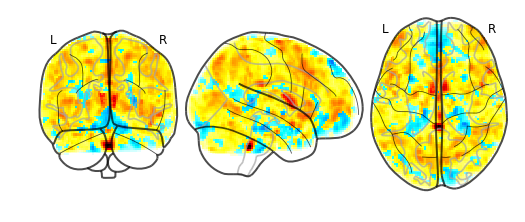

In [54]:
%matplotlib inline
plot_glass_brain("D:/data/neurovault/neurovault/vetted/train/0444.nii.gz", plot_abs=False)

In [48]:
labels.max()

0

In [39]:
maps

20468